In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks, savgol_filter

In [2]:
def read_csv_data(main_folder_path):
    data = []

    # Recorre todas las subcarpetas en el directorio principal especificado
    for subfolder_name in os.listdir(main_folder_path):
        subfolder_path = os.path.join(main_folder_path, subfolder_name)
        
        # Verifica que sea un directorio
        if os.path.isdir(subfolder_path):
            # Recorre todos los archivos en la subcarpeta
            for filename in os.listdir(subfolder_path):
                # Solo procesa archivos con extensión .csv
                if filename.endswith(".csv"):
                    # Construye la ruta completa del archivo
                    file_path = os.path.join(subfolder_path, filename)
                    
                    # Lee el archivo CSV, omitiendo la primera fila, sin encabezados, y separa los datos por comas
                    df = pd.read_csv(file_path, header=None, names=['I', 'Q'], skiprows=1)
                    
                    # Añade el DataFrame y la subcarpeta a la lista
                    data.append((subfolder_name, df))
    
    return data

# Especifica la ruta a tu carpeta principal
main_folder_path = "contenedor"

# Llama a la función y almacena los datos en una lista
data = read_csv_data(main_folder_path)

# Opcional: imprimir la cantidad de archivos leídos
print(f"Se han leído {len(data)} archivos CSV.")

# Opcional: imprimir las primeras filas de cada DataFrame junto con su subcarpeta
for i, (subfolder, df) in enumerate(data):
    print(f"Subcarpeta: {subfolder}, Archivo {i + 1}:\n", df.head().to_string(index=False))

Se han leído 81 archivos CSV.
Subcarpeta: 15.5GHz_spacing, Archivo 1:
         I         Q
 1.639193 -2.864446
 2.031449  0.380656
-0.096213  3.110882
-0.882746 -2.339520
 1.803395  1.087012
Subcarpeta: 15.5GHz_spacing, Archivo 2:
         I         Q
 2.223405 -2.569107
-2.955521  2.290002
 1.566678 -2.457914
-1.961902 -1.687558
-1.869490 -2.404541
Subcarpeta: 15.5GHz_spacing, Archivo 3:
         I         Q
-3.826914  3.647714
 3.255746 -3.370660
-1.601408 -0.944418
 2.978924 -3.060205
-1.448447  1.076949
Subcarpeta: 15.5GHz_spacing, Archivo 4:
        I         Q
3.210192 -0.880348
0.563303  2.368071
0.804705 -2.827221
1.029512  0.810397
2.824181  3.275104
Subcarpeta: 15.5GHz_spacing, Archivo 5:
        I         Q
1.608691 -2.933338
3.160963 -1.510941
1.232642  0.679080
1.201064 -0.923072
3.372391 -0.931085
Subcarpeta: 15.5GHz_spacing, Archivo 6:
         I         Q
 3.129326  0.445444
 0.804176 -0.965949
 0.913259  0.420738
 0.187945  3.270330
-2.312861 -3.089214
Subcarpeta: 15.5

In [3]:
def read_csv_data(main_folder_path):
    data = {}

    # Recorre todas las subcarpetas en el directorio principal especificado
    for subfolder_name in os.listdir(main_folder_path):
        subfolder_path = os.path.join(main_folder_path, subfolder_name)
        
        # Verifica que sea un directorio
        if os.path.isdir(subfolder_path):
            # Inicializa una lista para almacenar los DataFrames de esta subcarpeta
            data[subfolder_name] = []
            
            # Recorre todos los archivos en la subcarpeta
            for filename in os.listdir(subfolder_path):
                # Solo procesa archivos con extensión .csv
                if filename.endswith(".csv"):
                    # Construye la ruta completa del archivo
                    file_path = os.path.join(subfolder_path, filename)
                    
                    # Lee el archivo CSV, omitiendo la primera fila, sin encabezados, y separa los datos por comas
                    df = pd.read_csv(file_path, header=None, names=['I', 'Q'], skiprows=1)
                    
                    # Añade el DataFrame a la lista correspondiente a la subcarpeta
                    data[subfolder_name].append(df)
    
    return data

# Especifica la ruta a tu carpeta principal
main_folder_path = "contenedor"

# Llama a la función y almacena los datos en un diccionario
data = read_csv_data(main_folder_path)

# Opcional: imprimir la cantidad de archivos leídos por subcarpeta
for subfolder_name, dfs in data.items():
    print(f"Subcarpeta '{subfolder_name}': se han leído {len(dfs)} archivos CSV.")

# Opcional: imprimir las primeras filas de cada DataFrame junto con su subcarpeta
for subfolder_name, dfs in data.items():
    for i, df in enumerate(dfs):
        print(f"Subcarpeta: {subfolder_name}, Archivo {i + 1}:\n", df.head().to_string(index=False))

Subcarpeta '.ipynb_checkpoints': se han leído 0 archivos CSV.
Subcarpeta '15.5GHz_spacing': se han leído 9 archivos CSV.
Subcarpeta '15GHz_spacing': se han leído 7 archivos CSV.
Subcarpeta '16.5GHz_spacing': se han leído 11 archivos CSV.
Subcarpeta '16GHz_spacing': se han leído 11 archivos CSV.
Subcarpeta '17.6GHz_spacing': se han leído 11 archivos CSV.
Subcarpeta '17GHz_spacing': se han leído 11 archivos CSV.
Subcarpeta '18GHz_spacing': se han leído 10 archivos CSV.
Subcarpeta 'single_ch': se han leído 11 archivos CSV.
Subcarpeta: 15.5GHz_spacing, Archivo 1:
         I         Q
 1.639193 -2.864446
 2.031449  0.380656
-0.096213  3.110882
-0.882746 -2.339520
 1.803395  1.087012
Subcarpeta: 15.5GHz_spacing, Archivo 2:
         I         Q
 2.223405 -2.569107
-2.955521  2.290002
 1.566678 -2.457914
-1.961902 -1.687558
-1.869490 -2.404541
Subcarpeta: 15.5GHz_spacing, Archivo 3:
         I         Q
-3.826914  3.647714
 3.255746 -3.370660
-1.601408 -0.944418
 2.978924 -3.060205
-1.448447  

In [4]:
def list_subfolders(data):
    print("Subcarpetas disponibles:")
    for subfolder_name in data.keys():
        print(subfolder_name)


In [66]:
def find_peak_in_segment(counts, bin_edges, start, end):
    # Encontrar los índices de los bins que corresponden al segmento
    start_idx = np.searchsorted(bin_edges, start, side='right')
    end_idx = np.searchsorted(bin_edges, end, side='left')

    # Encontrar el pico más alto en el segmento
    peak_idx = start_idx + np.argmax(counts[start_idx:end_idx])

    return peak_idx

def plot_histograms_for_subfolder_I(data, subfolder_name):
    if subfolder_name not in data:
        print(f"La subcarpeta '{subfolder_name}' no existe en los datos.")
        return

    dfs = data[subfolder_name]

    # Generar un histograma para cada DataFrame en la subcarpeta seleccionada
    for i, df in enumerate(dfs):
        # Obtén los datos del histograma
        counts, bin_edges = np.histogram(df['I'], bins=100)
        
        # Encontrar el pico más alto en cada segmento
        peaks = [
            find_peak_in_segment(counts, bin_edges, -4, -2),
            find_peak_in_segment(counts, bin_edges, -2, 0),
            find_peak_in_segment(counts, bin_edges, 0, 2),
            find_peak_in_segment(counts, bin_edges, 2, 4)
        ]

        # Mostrar los datos del histograma
        print(f"Datos del histograma de I - Subcarpeta: {subfolder_name}, Archivo {i + 1}")
        print("Cuentas:", counts)
        print("Bin edges:", bin_edges)
        print("Picos encontrados en los segmentos:", bin_edges[peaks])
        print("Frecuencias en los picos:", counts[peaks])
        
        min_value = min(bin_edges)
        print("El valor más pequeño en bin_edges es:", min_value)
        max_value = max(bin_edges)
        print("El valor mayor en bin_edges es:", max_value)
        
        ensanchamiento = max_value - min_value
        
        print("El valor del ensanchamiento:", ensanchamiento)


        # Generar la gráfica del histograma
        plt.figure(figsize=(10, 6))
        plt.hist(df['I'], bins=100, alpha=0.7, color='blue', edgecolor='black')
        plt.plot(bin_edges[peaks], counts[peaks], 'ro')  # Resaltar los picos
        plt.title(f'Histograma de I - Subcarpeta: {subfolder_name}, Archivo {i + 1}')
        plt.xlabel('Valor de I')
        plt.ylabel('Frecuencia')
        plt.grid(True)
        plt.show()

def plot_histograms_for_subfolder_Q(data, subfolder_name):
    if subfolder_name not in data:
        print(f"La subcarpeta '{subfolder_name}' no existe en los datos.")
        return

    dfs = data[subfolder_name]

    # Generar un histograma para cada DataFrame en la subcarpeta seleccionada
    for i, df in enumerate(dfs):
        # Obtén los datos del histograma
        counts, bin_edges = np.histogram(df['Q'], bins=100)
        
        # Encontrar el pico más alto en cada segmento
        peaks = [
            find_peak_in_segment(counts, bin_edges, -4, -2),
            find_peak_in_segment(counts, bin_edges, -2, 0),
            find_peak_in_segment(counts, bin_edges, 0, 2),
            find_peak_in_segment(counts, bin_edges, 2, 4)
        ]

        # Mostrar los datos del histograma
        print(f"Datos del histograma de Q - Subcarpeta: {subfolder_name}, Archivo {i + 1}")
        print("Cuentas:", counts)
        print("Bin edges:", bin_edges)
        print("Picos encontrados en los segmentos:", bin_edges[peaks])
        print("Frecuencias en los picos:", counts[peaks])
        
        min_value = min(bin_edges)
        print("El valor más pequeño en bin_edges es:", min_value)
        max_value = max(bin_edges)
        print("El valor mayor en bin_edges es:", max_value)
        
        ensanchamiento = max_value - min_value
        
        print("El valor del ensanchamiento:", ensanchamiento)

        
        picos = bin_edges[peaks]

        # Generar la gráfica del histograma
        plt.figure(figsize=(10, 6))
        plt.hist(df['Q'], bins=100, alpha=0.7, color='blue', edgecolor='black')
        plt.plot(bin_edges[peaks], counts[peaks], 'ro')  # Resaltar los picos
        plt.title(f'Histograma de Q - Subcarpeta: {subfolder_name}, Archivo {i + 1}')
        plt.xlabel('Valor de Q')
        plt.ylabel('Frecuencia')
        plt.grid(True)
        plt.show()

Subcarpetas disponibles:
.ipynb_checkpoints
15.5GHz_spacing
15GHz_spacing
16.5GHz_spacing
16GHz_spacing
17.6GHz_spacing
17GHz_spacing
18GHz_spacing
single_ch
Datos del histograma de I - Subcarpeta: 15.5GHz_spacing, Archivo 1
Cuentas: [   1    0    3    9   13    7   28   41   63  123  161  244  353  469
  662  832 1048 1319 1514 1666 1845 2055 2023 2000 1922 1799 1640 1534
 1053 1224 1292 1401 1440 1537 1750 1870 1964 2115 2075 2116 2059 1826
 1735 1489 1405 1291 1100  839 1028 1229 1300 1550 1699 1788 1966 1937
 2108 1979 1938 1809 1597 1459 1293 1149 1112 1091  830 1078 1334 1543
 1685 1786 1964 1916 2034 1950 1816 1617 1496 1200  928  745  588  437
  298  231  144   98   58   33   34    9   10    2    5    2    2    2
    1    1]
Bin edges: [-5.13529621 -5.02817351 -4.9210508  -4.81392809 -4.70680538 -4.59968267
 -4.49255996 -4.38543725 -4.27831454 -4.17119183 -4.06406913 -3.95694642
 -3.84982371 -3.742701   -3.63557829 -3.52845558 -3.42133287 -3.31421016
 -3.20708746 -3.09996475 -2

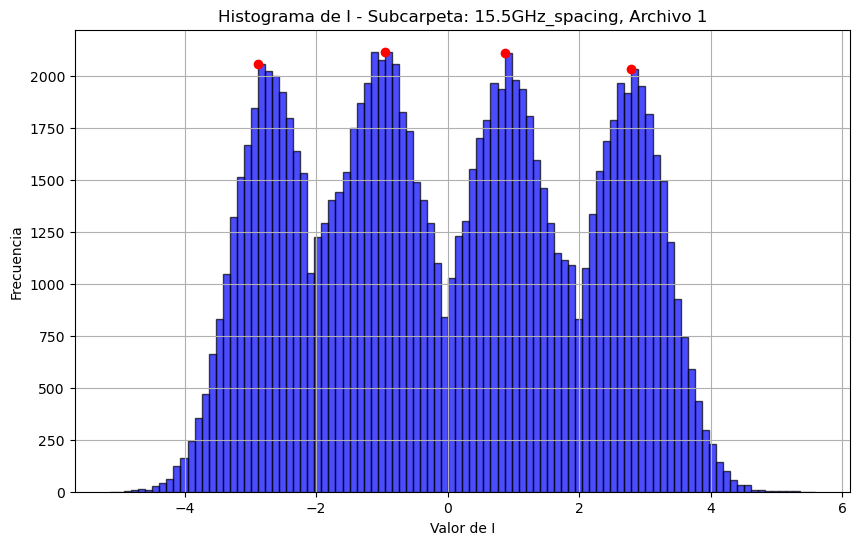

Datos del histograma de I - Subcarpeta: 15.5GHz_spacing, Archivo 2
Cuentas: [   1    0    2    5    5    7   17   24   43   75  109  168  247  374
  461  627  847 1089 1335 1543 1813 1969 2107 2036 2000 1962 1783 1533
 1370 1199  878 1070 1120 1242 1317 1432 1602 1761 1965 2089 2114 2146
 2008 1831 1614 1480 1290 1088 1058  779  787  948 1103 1310 1449 1653
 1766 2008 2031 2079 2009 1902 1736 1566 1383 1184 1075  903  870  695
  944 1115 1216 1428 1598 1847 1950 2024 2024 2002 1855 1663 1475 1142
  975  694  574  445  263  180  138   84   50   29   31   12    6    4
    2    2]
Bin edges: [-5.10160766 -5.00021427 -4.89882088 -4.79742749 -4.6960341  -4.5946407
 -4.49324731 -4.39185392 -4.29046053 -4.18906713 -4.08767374 -3.98628035
 -3.88488696 -3.78349356 -3.68210017 -3.58070678 -3.47931339 -3.37792
 -3.2765266  -3.17513321 -3.07373982 -2.97234643 -2.87095303 -2.76955964
 -2.66816625 -2.56677286 -2.46537947 -2.36398607 -2.26259268 -2.16119929
 -2.0598059  -1.9584125  -1.85701911 -1.755

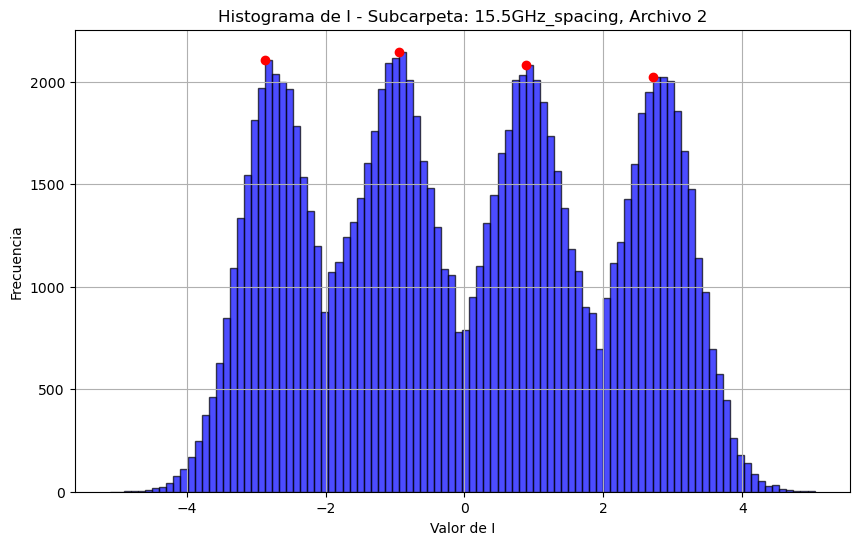

Datos del histograma de I - Subcarpeta: 15.5GHz_spacing, Archivo 3
Cuentas: [   2    2    4    1    2   10   15   18   45   77  107  200  269  440
  598  777 1048 1254 1542 1925 2004 2119 2246 2130 1981 1847 1607 1346
 1151  805  846  920  978 1088 1210 1468 1680 1941 2133 2217 2173 2247
 2067 1791 1561 1302 1164  993  813  665  569  793  971 1140 1241 1525
 1831 1962 2078 2076 2146 2034 1835 1705 1422 1151  918  797  745  683
  568  822  941 1213 1432 1570 1848 2029 2120 2120 2211 1973 1726 1501
 1147  922  722  527  354  221  174  104   63   44   26   19    7    4
    2    3]
Bin edges: [-4.94534282 -4.84711246 -4.74888209 -4.65065173 -4.55242136 -4.454191
 -4.35596064 -4.25773027 -4.15949991 -4.06126954 -3.96303918 -3.86480881
 -3.76657845 -3.66834809 -3.57011772 -3.47188736 -3.37365699 -3.27542663
 -3.17719627 -3.0789659  -2.98073554 -2.88250517 -2.78427481 -2.68604444
 -2.58781408 -2.48958372 -2.39135335 -2.29312299 -2.19489262 -2.09666226
 -1.9984319  -1.90020153 -1.80197117 -1.7

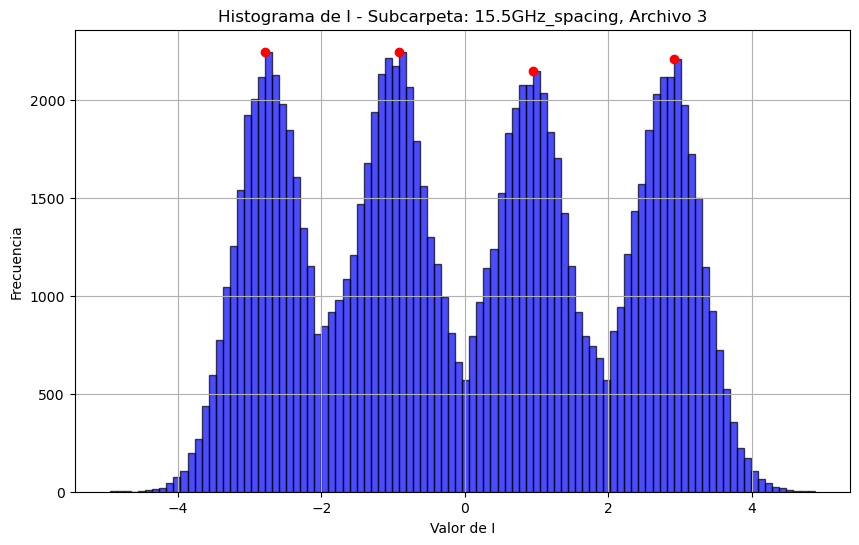

Datos del histograma de I - Subcarpeta: 15.5GHz_spacing, Archivo 4
Cuentas: [   1    0    0    3    6    8    9   14   26   57   61  130  211  306
  473  674  924 1227 1513 1932 2209 2323 2395 2350 2137 1909 1594 1264
 1082  866  798  861  943 1048 1235 1525 1852 2136 2283 2412 2405 2363
 2060 1772 1490 1166  986  821  713  570  684  842 1028 1193 1519 1718
 1977 2163 2279 2348 2124 2046 1742 1467 1163  989  793  679  588  623
  820  993 1173 1446 1661 1972 2166 2353 2282 2165 1986 1689 1438 1114
  827  610  365  257  177  107   69   39   19   14    3    4    3    1
    1    2]
Bin edges: [-5.03044468 -4.92937538 -4.82830607 -4.72723677 -4.62616746 -4.52509816
 -4.42402885 -4.32295955 -4.22189025 -4.12082094 -4.01975164 -3.91868233
 -3.81761303 -3.71654372 -3.61547442 -3.51440511 -3.41333581 -3.3122665
 -3.2111972  -3.11012789 -3.00905859 -2.90798928 -2.80691998 -2.70585067
 -2.60478137 -2.50371207 -2.40264276 -2.30157346 -2.20050415 -2.09943485
 -1.99836554 -1.89729624 -1.79622693 -1.

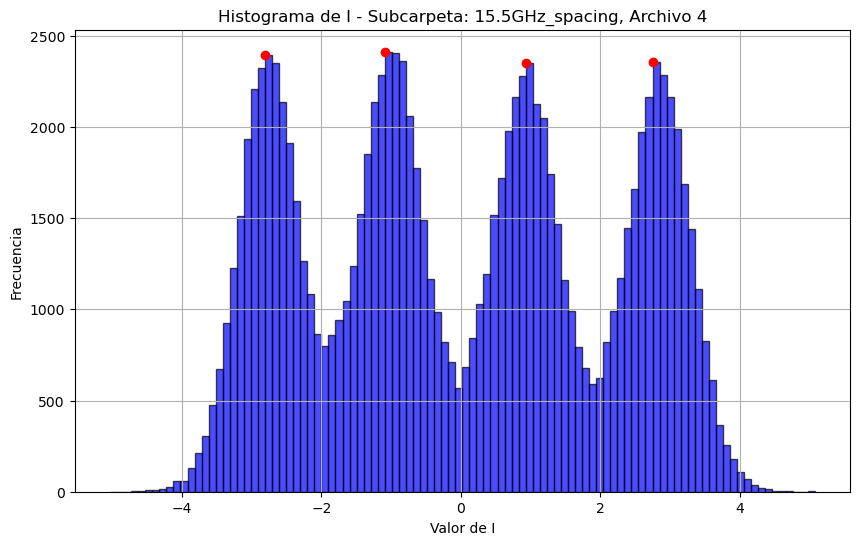

Datos del histograma de I - Subcarpeta: 15.5GHz_spacing, Archivo 5
Cuentas: [   2    6    4   10    8   13   38   42   69  134  196  270  421  597
  848 1119 1412 1737 2026 2201 2321 2306 2098 1933 1672 1404 1186 1025
  799  624  685  740  898 1075 1288 1491 1841 2007 2379 2422 2356 2215
 1936 1631 1417 1089  903  736  652  529  533  665  735  932 1110 1417
 1661 1904 2164 2258 2259 2122 1960 1763 1490 1175 1000  773  647  549
  473  492  670  829 1014 1273 1499 1812 1983 2182 2203 2142 2061 1848
 1659 1357 1070  802  522  344  270  167   99   56   45   25   18   10
    6    5]
Bin edges: [-4.72996628 -4.63593612 -4.54190596 -4.44787581 -4.35384565 -4.25981549
 -4.16578533 -4.07175517 -3.97772501 -3.88369485 -3.7896647  -3.69563454
 -3.60160438 -3.50757422 -3.41354406 -3.3195139  -3.22548374 -3.13145359
 -3.03742343 -2.94339327 -2.84936311 -2.75533295 -2.66130279 -2.56727264
 -2.47324248 -2.37921232 -2.28518216 -2.191152   -2.09712184 -2.00309168
 -1.90906153 -1.81503137 -1.72100121 -1

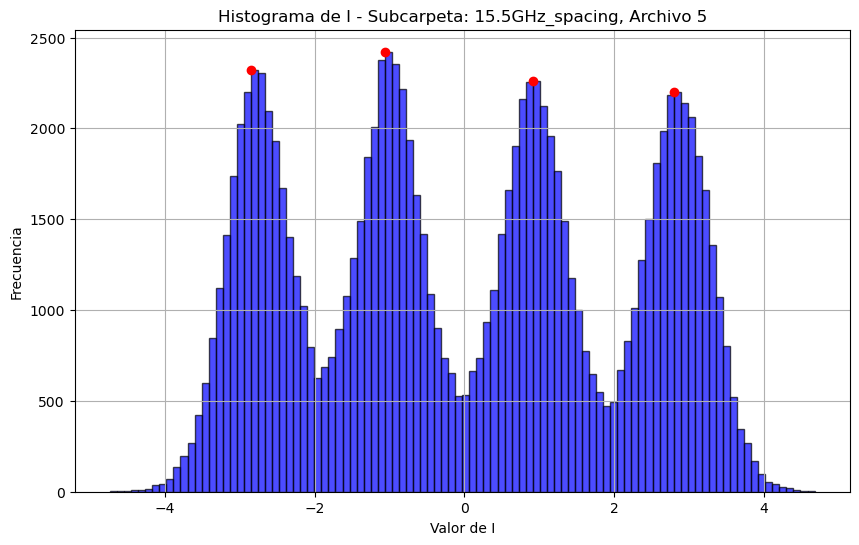

Datos del histograma de I - Subcarpeta: 15.5GHz_spacing, Archivo 6
Cuentas: [   1    0    1    0    0    3    0   10    8   15   32   61  103  150
  219  376  549  872 1170 1569 1946 2397 2545 2610 2472 2229 1952 1534
 1265 1011  826  553  649  643  753  926 1254 1629 2032 2354 2647 2668
 2471 2291 1965 1571 1259 1049  776  610  571  442  553  683  767 1095
 1401 1675 2001 2348 2534 2469 2425 2108 1784 1418 1198  917  676  564
  431  386  594  667  887 1136 1434 1693 2008 2305 2506 2508 2347 2136
 1779 1337 1048  670  513  306  208  139   74   41   18   21    6    7
    3    1]
Bin edges: [-5.0763072  -4.97816921 -4.88003121 -4.78189322 -4.68375523 -4.58561723
 -4.48747924 -4.38934124 -4.29120325 -4.19306525 -4.09492726 -3.99678926
 -3.89865127 -3.80051327 -3.70237528 -3.60423728 -3.50609929 -3.40796129
 -3.3098233  -3.2116853  -3.11354731 -3.01540932 -2.91727132 -2.81913333
 -2.72099533 -2.62285734 -2.52471934 -2.42658135 -2.32844335 -2.23030536
 -2.13216736 -2.03402937 -1.93589137 -1

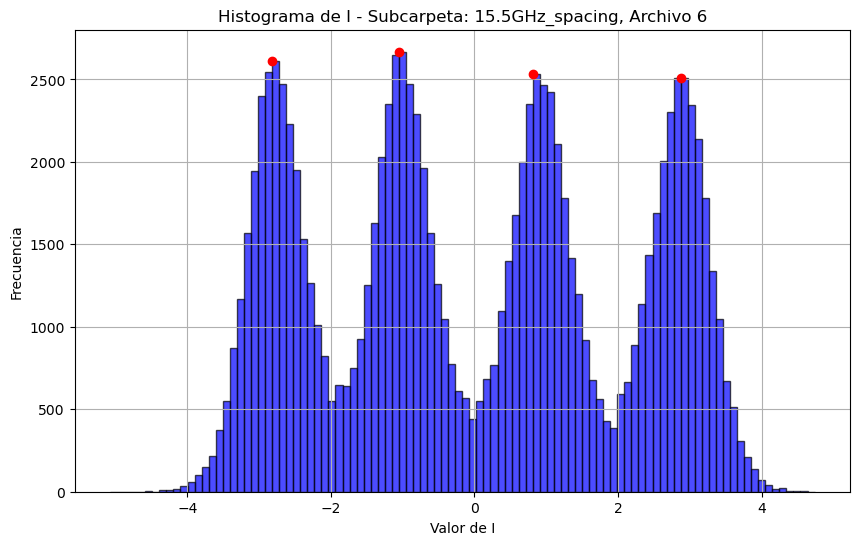

Datos del histograma de I - Subcarpeta: 15.5GHz_spacing, Archivo 7
Cuentas: [   1    1    0    3    1    6   10   13   18   35   67   95  152  221
  356  567  896 1144 1726 2011 2353 2646 2687 2506 2220 1855 1534 1187
  877  771  519  629  679  815  988 1358 1724 2091 2425 2797 2655 2522
 2279 1855 1527 1214  922  732  619  524  441  568  727  895 1169 1463
 1817 2189 2419 2536 2559 2318 2014 1648 1333 1048  791  603  515  401
  510  604  762 1079 1256 1579 1922 2251 2469 2582 2500 2244 1866 1477
 1197  825  520  353  261  117   91   49   33    9    8    6    3    3
    0    1]
Bin edges: [-4.991363   -4.89227908 -4.79319516 -4.69411124 -4.59502732 -4.4959434
 -4.39685948 -4.29777556 -4.19869164 -4.09960772 -4.0005238  -3.90143988
 -3.80235596 -3.70327204 -3.60418812 -3.5051042  -3.40602028 -3.30693636
 -3.20785244 -3.10876852 -3.0096846  -2.91060068 -2.81151676 -2.71243284
 -2.61334892 -2.514265   -2.41518108 -2.31609715 -2.21701323 -2.11792931
 -2.01884539 -1.91976147 -1.82067755 -1.

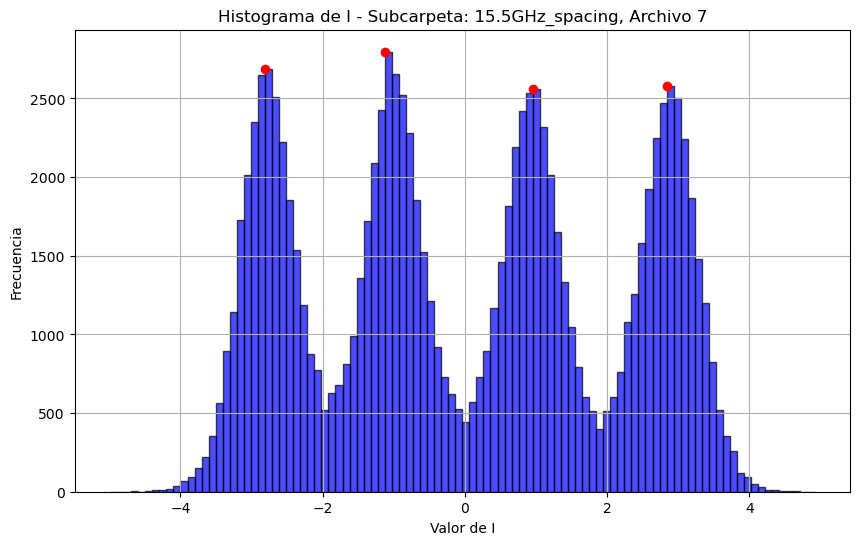

Datos del histograma de I - Subcarpeta: 15.5GHz_spacing, Archivo 8
Cuentas: [   1    1    3    7   11   15   28   45   71  113  196  316  444  681
  986 1346 1781 2113 2454 2542 2634 2364 2133 1717 1443 1098  847  725
  489  554  573  655  849 1035 1378 1683 2179 2421 2587 2527 2471 2177
 1784 1378 1094  825  666  574  437  388  484  565  764  961 1202 1533
 1864 2138 2405 2494 2433 2183 1938 1643 1278  981  774  597  468  428
  364  515  587  825 1011 1370 1575 1852 2210 2463 2500 2389 2179 1944
 1551 1147  825  601  373  241  131   98   55   35   17   16    8    5
    2    3]
Bin edges: [-4.65409062 -4.5605182  -4.46694578 -4.37337337 -4.27980095 -4.18622853
 -4.09265611 -3.99908369 -3.90551127 -3.81193885 -3.71836643 -3.62479401
 -3.53122159 -3.43764917 -3.34407675 -3.25050433 -3.15693191 -3.06335949
 -2.96978707 -2.87621465 -2.78264223 -2.68906981 -2.59549739 -2.50192497
 -2.40835255 -2.31478013 -2.22120771 -2.12763529 -2.03406287 -1.94049045
 -1.84691803 -1.75334561 -1.65977319 -1

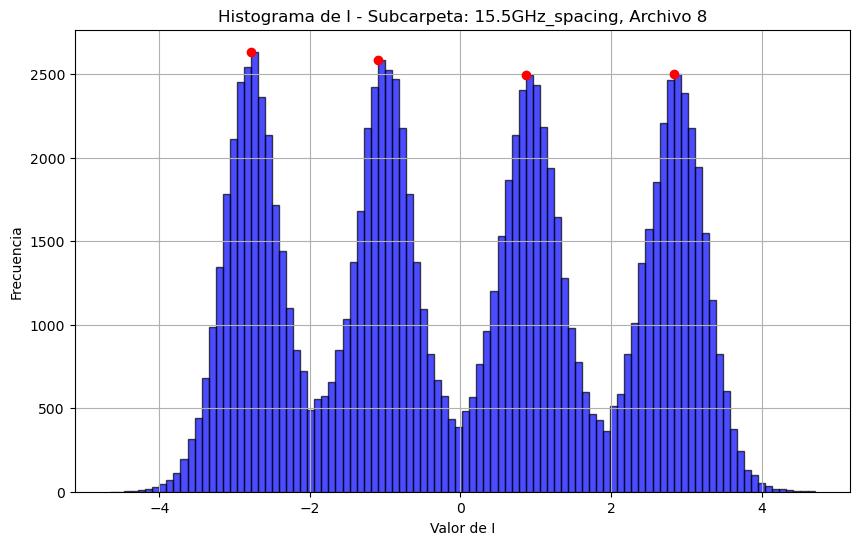

Datos del histograma de I - Subcarpeta: 15.5GHz_spacing, Archivo 9
Cuentas: [   5    4    8   11   17   32   48   77  133  207  292  442  688  973
 1367 1797 2145 2416 2580 2527 2330 2075 1786 1422 1107  860  687  458
  538  507  625  765  955 1279 1592 2092 2384 2526 2621 2566 2193 1843
 1556 1162  919  716  561  451  361  384  486  624  797  996 1260 1564
 1911 2300 2371 2448 2373 2251 1910 1529 1173  881  691  493  450  406
  357  504  591  782  989 1278 1581 1838 2161 2421 2489 2391 2281 1877
 1618 1163  880  591  369  272  171  107   59   31   28   10    8    8
    1    4]
Bin edges: [-4.52687525 -4.43496452 -4.34305379 -4.25114306 -4.15923233 -4.0673216
 -3.97541087 -3.88350014 -3.79158941 -3.69967868 -3.60776795 -3.51585722
 -3.42394649 -3.33203576 -3.24012503 -3.1482143  -3.05630357 -2.96439284
 -2.87248211 -2.78057138 -2.68866065 -2.59674992 -2.50483919 -2.41292846
 -2.32101773 -2.229107   -2.13719627 -2.04528554 -1.95337481 -1.86146408
 -1.76955335 -1.67764262 -1.58573189 -1.

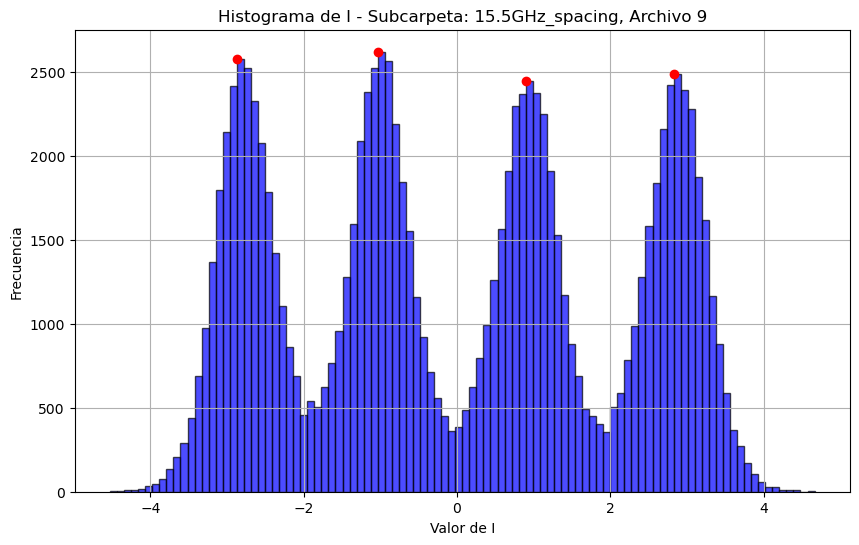

In [67]:
# Lista las subcarpetas disponibles
list_subfolders(data)
# Llama a la función para generar histogramas
plot_histograms_for_subfolder_I(data, selected_subfolder)

Subcarpetas disponibles:
.ipynb_checkpoints
15.5GHz_spacing
15GHz_spacing
16.5GHz_spacing
16GHz_spacing
17.6GHz_spacing
17GHz_spacing
18GHz_spacing
single_ch
Datos del histograma de Q - Subcarpeta: 15.5GHz_spacing, Archivo 1
Cuentas: [   1    2    2    4    2    4    7    9   32   43   51   91  134  196
  278  391  510  680  835 1078 1309 1529 1708 1820 1877 1882 1832 1852
 1771 1620 1463 1289  904 1082 1199 1187 1282 1360 1563 1694 1822 1990
 1928 1958 1995 1891 1690 1686 1429 1331 1203  899 1095 1214 1287 1440
 1560 1720 1856 1935 2125 2012 1953 1914 1857 1660 1488 1430 1423 1316
 1306 1168 1526 1698 1744 1877 2046 1986 1939 1789 1595 1431 1247  973
  742  608  473  325  255  155  116   77   47   25   16    7    4    2
    3    4]
Bin edges: [-5.45150021 -5.34593251 -5.2403648  -5.13479709 -5.02922939 -4.92366168
 -4.81809398 -4.71252627 -4.60695856 -4.50139086 -4.39582315 -4.29025544
 -4.18468774 -4.07912003 -3.97355233 -3.86798462 -3.76241691 -3.65684921
 -3.5512815  -3.4457138  -3

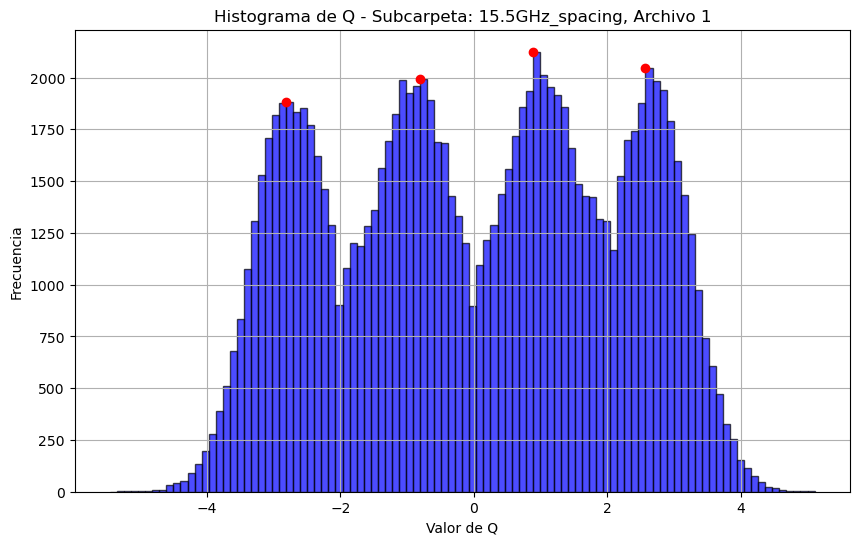

Datos del histograma de Q - Subcarpeta: 15.5GHz_spacing, Archivo 2
Cuentas: [   1    0    0    3    5    8   13   24   31   66   79  161  180  320
  432  595  811 1010 1256 1444 1684 1857 2015 2079 2023 1996 1787 1648
 1406 1175 1079  799  944 1053 1097 1159 1343 1555 1756 1911 2058 2115
 2039 1978 1874 1771 1590 1348 1153 1032  696  965 1044 1200 1365 1564
 1725 1880 2049 2160 2107 2083 1949 1744 1582 1423 1344 1290 1165 1064
 1127 1396 1546 1846 1968 2054 2011 2049 1965 1827 1527 1372 1096  846
  653  440  339  219  156   86   66   53   27   14   11    5    0    0
    2    1]
Bin edges: [-5.24036345 -5.13663248 -5.0329015  -4.92917053 -4.82543955 -4.72170858
 -4.6179776  -4.51424663 -4.41051565 -4.30678468 -4.2030537  -4.09932272
 -3.99559175 -3.89186077 -3.7881298  -3.68439882 -3.58066785 -3.47693687
 -3.3732059  -3.26947492 -3.16574395 -3.06201297 -2.958282   -2.85455102
 -2.75082004 -2.64708907 -2.54335809 -2.43962712 -2.33589614 -2.23216517
 -2.12843419 -2.02470322 -1.92097224 -1

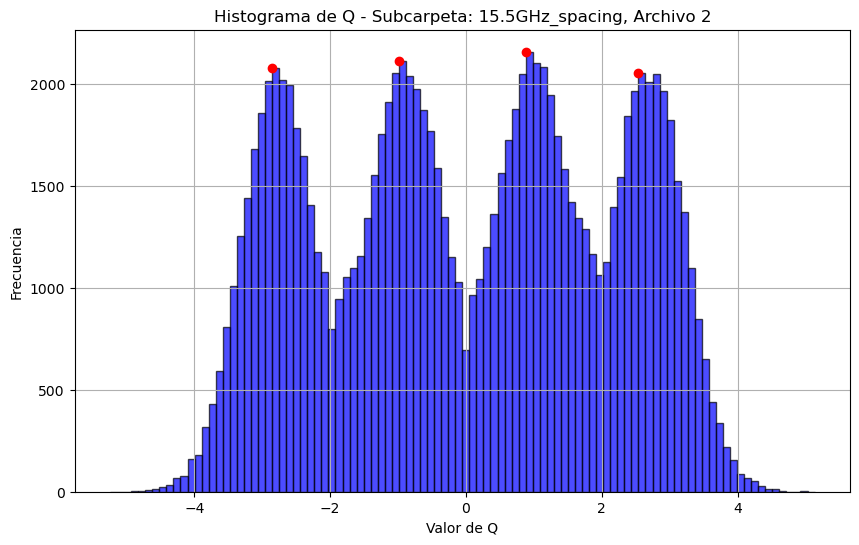

Datos del histograma de Q - Subcarpeta: 15.5GHz_spacing, Archivo 3
Cuentas: [   1    2    2    2    2    3    7   23   22   33   65  114  173  240
  341  490  709  859 1152 1431 1648 1869 1976 2069 2030 2025 1890 1697
 1464 1285 1070  918  626  764  793  852 1007 1169 1374 1534 1729 1971
 2049 2056 2142 2040 1827 1527 1378 1183  987  869  650  681  862  955
 1109 1257 1521 1678 1929 2097 2127 2136 2059 1913 1758 1525 1281 1142
 1113  910  900  883 1135 1341 1551 1726 2005 2080 2091 2135 1959 1887
 1608 1406 1102  863  631  452  336  210  139   82   67   35   22   11
    9    6]
Bin edges: [-5.15274626 -5.05522571 -4.95770517 -4.86018462 -4.76266408 -4.66514353
 -4.56762299 -4.47010244 -4.37258189 -4.27506135 -4.1775408  -4.08002026
 -3.98249971 -3.88497917 -3.78745862 -3.68993808 -3.59241753 -3.49489698
 -3.39737644 -3.29985589 -3.20233535 -3.1048148  -3.00729426 -2.90977371
 -2.81225316 -2.71473262 -2.61721207 -2.51969153 -2.42217098 -2.32465044
 -2.22712989 -2.12960935 -2.0320888  -1

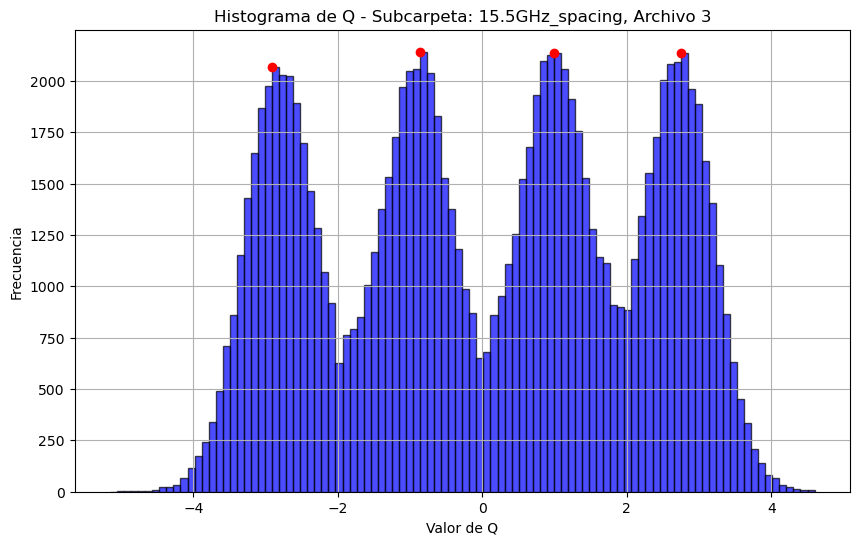

Datos del histograma de Q - Subcarpeta: 15.5GHz_spacing, Archivo 4
Cuentas: [   1    1    1    1    5    2   10   14   25   46   76  117  180  261
  401  514  745  988 1290 1554 1818 2091 2248 2276 2195 2053 1792 1585
 1342 1091  912  641  741  728  865  948 1159 1333 1701 1902 2149 2259
 2241 2157 1960 1810 1618 1278 1121  841  810  566  765  850 1018 1217
 1450 1766 1910 2171 2324 2354 2189 2003 1821 1614 1329 1093  943  921
  887  825 1178 1399 1703 1888 2084 2265 2262 2233 2072 1819 1616 1257
  939  731  544  328  238  158   97   63   33   17    8   10    3    4
    1    1]
Bin edges: [-5.16457896 -5.0639678  -4.96335665 -4.8627455  -4.76213434 -4.66152319
 -4.56091204 -4.46030088 -4.35968973 -4.25907858 -4.15846742 -4.05785627
 -3.95724512 -3.85663396 -3.75602281 -3.65541166 -3.5548005  -3.45418935
 -3.3535782  -3.25296704 -3.15235589 -3.05174473 -2.95113358 -2.85052243
 -2.74991127 -2.64930012 -2.54868897 -2.44807781 -2.34746666 -2.24685551
 -2.14624435 -2.0456332  -1.94502205 -1

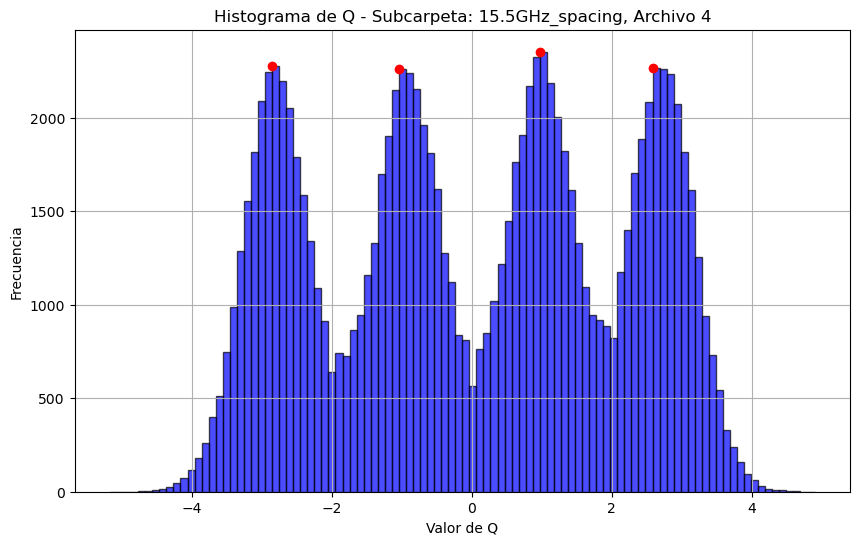

Datos del histograma de Q - Subcarpeta: 15.5GHz_spacing, Archivo 5
Cuentas: [   1    3    4    5   17   10   27   40   81  122  182  276  398  575
  794 1103 1384 1671 1932 2087 2291 2239 2199 1949 1746 1568 1243 1008
  790  596  601  649  722  814 1081 1261 1630 1750 2086 2206 2316 2264
 2124 1955 1680 1359 1073  928  742  605  539  677  762  945 1141 1463
 1741 1965 2255 2274 2383 2269 2089 1796 1511 1217 1075  904  781  787
  703  992 1215 1380 1766 2048 2164 2399 2440 2274 2016 1703 1447 1076
  794  592  411  261  160  100   64   42   23   16   11    3    1    1
    0    1]
Bin edges: [-4.88261435e+00 -4.78490835e+00 -4.68720235e+00 -4.58949635e+00
 -4.49179035e+00 -4.39408435e+00 -4.29637835e+00 -4.19867236e+00
 -4.10096636e+00 -4.00326036e+00 -3.90555436e+00 -3.80784836e+00
 -3.71014236e+00 -3.61243636e+00 -3.51473036e+00 -3.41702436e+00
 -3.31931837e+00 -3.22161237e+00 -3.12390637e+00 -3.02620037e+00
 -2.92849437e+00 -2.83078837e+00 -2.73308237e+00 -2.63537637e+00
 -2.53767037e+

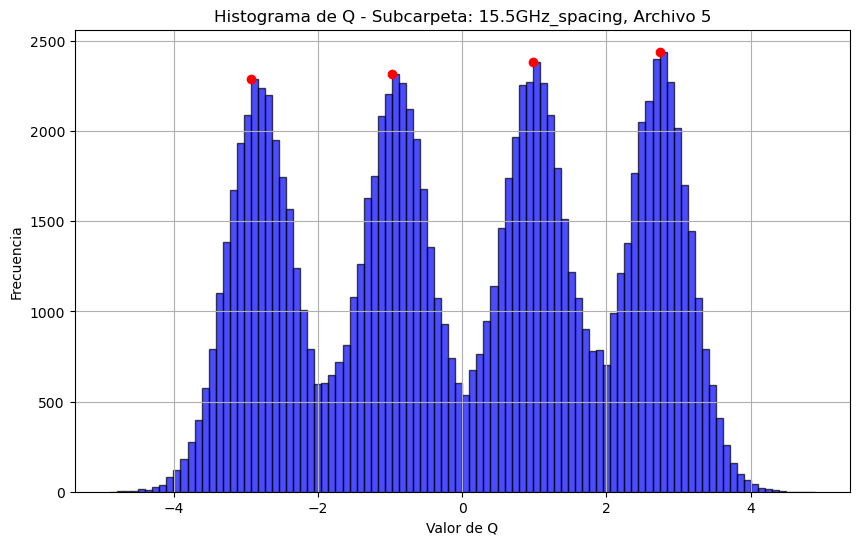

Datos del histograma de Q - Subcarpeta: 15.5GHz_spacing, Archivo 6
Cuentas: [   1    2    2    3    5    8    8   23   44   88  105  187  270  417
  597  861 1199 1540 1791 2146 2337 2475 2458 2137 1906 1562 1342 1084
  862  704  463  571  600  713  871 1093 1373 1744 2055 2258 2491 2448
 2337 2069 1742 1447 1168  961  704  584  490  558  686  807  977 1271
 1603 1932 2184 2344 2453 2518 2313 2000 1682 1357 1084  877  747  641
  592  820 1055 1281 1663 1886 2298 2471 2491 2419 2250 1820 1588 1217
  871  640  419  271  148  113   52   54   28   13    8    9    4    1
    1    1]
Bin edges: [-4.94934051 -4.85126952 -4.75319853 -4.65512754 -4.55705655 -4.45898556
 -4.36091457 -4.26284358 -4.16477259 -4.0667016  -3.96863061 -3.87055962
 -3.77248863 -3.67441763 -3.57634664 -3.47827565 -3.38020466 -3.28213367
 -3.18406268 -3.08599169 -2.9879207  -2.88984971 -2.79177872 -2.69370773
 -2.59563674 -2.49756575 -2.39949476 -2.30142377 -2.20335278 -2.10528179
 -2.0072108  -1.9091398  -1.81106881 -1

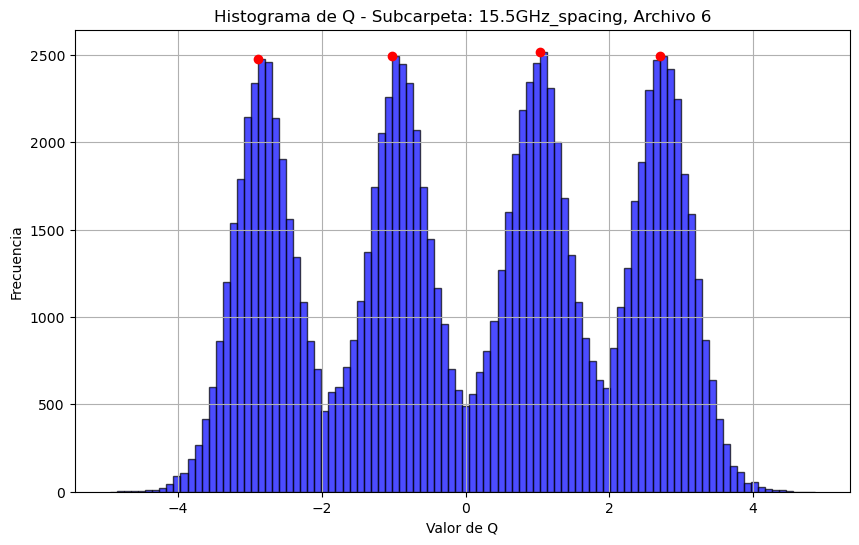

Datos del histograma de Q - Subcarpeta: 15.5GHz_spacing, Archivo 7
Cuentas: [   1    0    1    1    4    8    8   18   23   30   76   79  155  250
  387  516  799 1093 1433 1738 2053 2377 2418 2383 2316 1998 1753 1393
 1150  855  694  520  588  574  677  830 1114 1342 1638 1910 2237 2473
 2492 2357 2157 1764 1584 1266  962  798  634  467  517  714  776  957
 1263 1647 1911 2188 2521 2516 2492 2273 2057 1629 1301 1056  851  713
  681  575  882 1115 1332 1726 2006 2233 2385 2556 2410 2248 1907 1565
 1129  813  565  351  225  167   93   37   33   27   14   10    2    0
    0    1]
Bin edges: [-5.08878472 -4.98998773 -4.89119075 -4.79239376 -4.69359678 -4.59479979
 -4.49600281 -4.39720582 -4.29840883 -4.19961185 -4.10081486 -4.00201788
 -3.90322089 -3.8044239  -3.70562692 -3.60682993 -3.50803295 -3.40923596
 -3.31043898 -3.21164199 -3.112845   -3.01404802 -2.91525103 -2.81645405
 -2.71765706 -2.61886008 -2.52006309 -2.4212661  -2.32246912 -2.22367213
 -2.12487515 -2.02607816 -1.92728118 -1

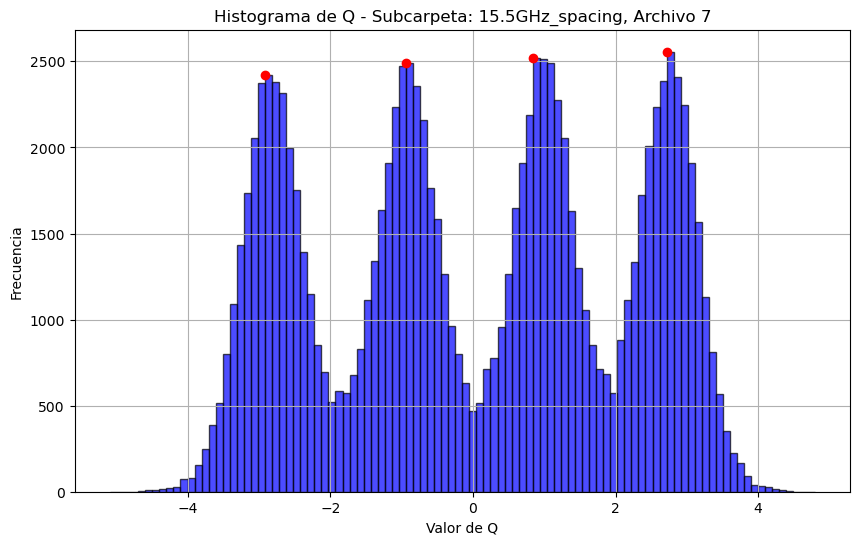

Datos del histograma de Q - Subcarpeta: 15.5GHz_spacing, Archivo 8
Cuentas: [   1    0    0    1    0    2    1    8   16   25   33   70  106  144
  218  415  624  849 1136 1484 1887 2102 2460 2603 2545 2237 2000 1642
 1247 1032  770  642  504  398  506  571  742  933 1160 1438 1873 2166
 2378 2490 2591 2328 2067 1645 1271  990  729  620  549  378  466  604
  728  900 1247 1583 1954 2260 2475 2560 2523 2344 2034 1647 1337  967
  831  642  591  526  715  902 1128 1463 1824 2129 2369 2617 2518 2386
 2126 1771 1268  984  657  444  264  169  126   77   39   19   12    8
    1    2]
Bin edges: [-5.09513704 -4.99922701 -4.90331697 -4.80740693 -4.71149689 -4.61558685
 -4.51967681 -4.42376677 -4.32785674 -4.2319467  -4.13603666 -4.04012662
 -3.94421658 -3.84830654 -3.7523965  -3.65648647 -3.56057643 -3.46466639
 -3.36875635 -3.27284631 -3.17693627 -3.08102624 -2.9851162  -2.88920616
 -2.79329612 -2.69738608 -2.60147604 -2.505566   -2.40965597 -2.31374593
 -2.21783589 -2.12192585 -2.02601581 -1

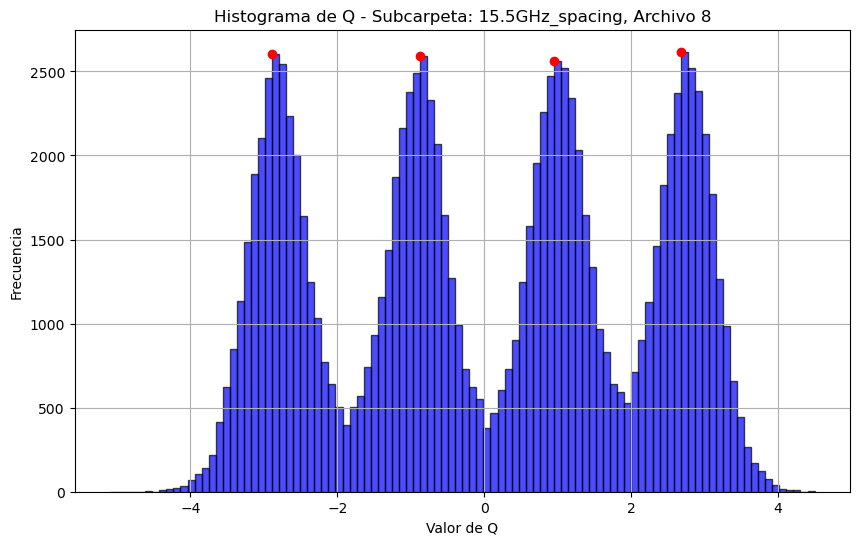

Datos del histograma de Q - Subcarpeta: 15.5GHz_spacing, Archivo 9
Cuentas: [   1    3    4    9   19   21   43   55   94  157  255  387  528  790
 1147 1479 1831 2189 2485 2595 2469 2242 1927 1661 1342 1066  842  637
  502  401  443  520  635  851 1132 1433 1808 2100 2418 2492 2417 2342
 2039 1750 1385 1065  831  625  553  382  475  581  646  802 1105 1398
 1773 2114 2341 2577 2603 2508 2091 1791 1443 1101  915  682  634  581
  501  744 1006 1234 1545 1935 2274 2510 2525 2473 2354 1919 1591 1276
  802  569  403  244  169  100   60   22   14   19    7    3    1    0
    0    1]
Bin edges: [-4.69981171 -4.60485088 -4.50989005 -4.41492923 -4.3199684  -4.22500758
 -4.13004675 -4.03508593 -3.9401251  -3.84516427 -3.75020345 -3.65524262
 -3.5602818  -3.46532097 -3.37036014 -3.27539932 -3.18043849 -3.08547767
 -2.99051684 -2.89555602 -2.80059519 -2.70563436 -2.61067354 -2.51571271
 -2.42075189 -2.32579106 -2.23083024 -2.13586941 -2.04090858 -1.94594776
 -1.85098693 -1.75602611 -1.66106528 -1

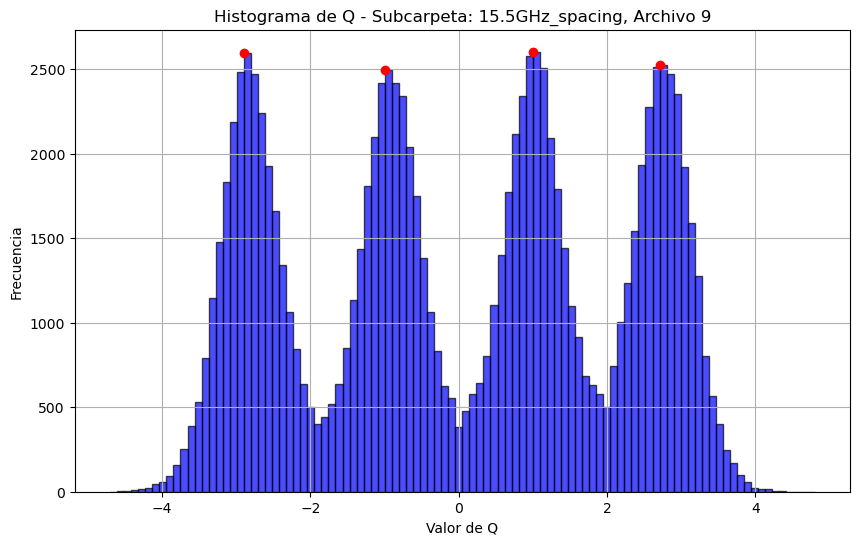

In [62]:
# Lista las subcarpetas disponibles
list_subfolders(data)


# Llama a la función para generar histogramas
plot_histograms_for_subfolder_Q(data, selected_subfolder)

In [63]:
# prueba valles
def find_valley_in_segment(counts, bin_edges, start, end):
    # Encontrar los índices de los bins que corresponden al segmento
    start_idx = np.searchsorted(bin_edges, start, side='right')
    end_idx = np.searchsorted(bin_edges, end, side='left')

    # Encontrar el valle más bajo en el segmento
    valley_idx = start_idx + np.argmin(counts[start_idx:end_idx])

    return valley_idx

def plot_histograms_for_subfolder(data, subfolder_name, var_name):
    if subfolder_name not in data:
        print(f"La subcarpeta '{subfolder_name}' no existe en los datos.")
        return

    dfs = data[subfolder_name]

    # Generar un histograma para cada DataFrame en la subcarpeta seleccionada
    for i, df in enumerate(dfs):
        # Obtén los datos del histograma
        counts, bin_edges = np.histogram(df[var_name], bins=100)
        
        # Encontrar el valle más bajo en cada segmento
        valleys = [
            find_valley_in_segment(counts, bin_edges, -3, -1),
            find_valley_in_segment(counts, bin_edges, -1, 1),
            find_valley_in_segment(counts, bin_edges, 1, 3)
        ]

        # Mostrar los datos del histograma
        print(f"Datos del histograma de {var_name} - Subcarpeta: {subfolder_name}, Archivo {i + 1}")
        print("Cuentas:", counts)
        print("Bin edges:", bin_edges)
        print("Valles encontrados en los segmentos:", bin_edges[valleys])
        print("Frecuencias en los valles:", counts[valleys])
        
        min_value = min(bin_edges)
        print("El valor más pequeño en bin_edges es:", min_value)
        max_value = max(bin_edges)
        print("El valor mayor en bin_edges es:", max_value)
        
        ensanchamiento = max_value - min_value
        
        print("El valor del ensanchamiento:", ensanchamiento)

        # Generar la gráfica del histograma
        plt.figure(figsize=(10, 6))
        plt.hist(df[var_name], bins=100, alpha=0.7, color='blue', edgecolor='black')
        plt.plot(bin_edges[valleys], counts[valleys], 'ro')  # Resaltar los valles
        plt.title(f'Histograma de {var_name} - Subcarpeta: {subfolder_name}, Archivo {i + 1}')
        plt.xlabel(f'Valor de {var_name}')
        plt.ylabel('Frecuencia')
        plt.grid(True)
        plt.show()
        


Subcarpetas disponibles:
.ipynb_checkpoints
15.5GHz_spacing
15GHz_spacing
16.5GHz_spacing
16GHz_spacing
17.6GHz_spacing
17GHz_spacing
18GHz_spacing
single_ch
Datos del histograma de I - Subcarpeta: 15.5GHz_spacing, Archivo 1
Cuentas: [   1    0    3    9   13    7   28   41   63  123  161  244  353  469
  662  832 1048 1319 1514 1666 1845 2055 2023 2000 1922 1799 1640 1534
 1053 1224 1292 1401 1440 1537 1750 1870 1964 2115 2075 2116 2059 1826
 1735 1489 1405 1291 1100  839 1028 1229 1300 1550 1699 1788 1966 1937
 2108 1979 1938 1809 1597 1459 1293 1149 1112 1091  830 1078 1334 1543
 1685 1786 1964 1916 2034 1950 1816 1617 1496 1200  928  745  588  437
  298  231  144   98   58   33   34    9   10    2    5    2    2    2
    1    1]
Bin edges: [-5.13529621 -5.02817351 -4.9210508  -4.81392809 -4.70680538 -4.59968267
 -4.49255996 -4.38543725 -4.27831454 -4.17119183 -4.06406913 -3.95694642
 -3.84982371 -3.742701   -3.63557829 -3.52845558 -3.42133287 -3.31421016
 -3.20708746 -3.09996475 -2

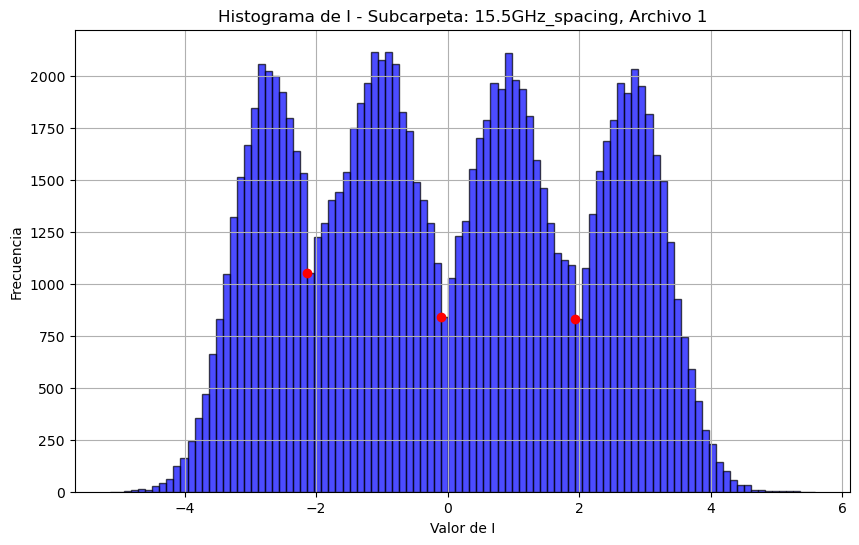

Datos del histograma de I - Subcarpeta: 15.5GHz_spacing, Archivo 2
Cuentas: [   1    0    2    5    5    7   17   24   43   75  109  168  247  374
  461  627  847 1089 1335 1543 1813 1969 2107 2036 2000 1962 1783 1533
 1370 1199  878 1070 1120 1242 1317 1432 1602 1761 1965 2089 2114 2146
 2008 1831 1614 1480 1290 1088 1058  779  787  948 1103 1310 1449 1653
 1766 2008 2031 2079 2009 1902 1736 1566 1383 1184 1075  903  870  695
  944 1115 1216 1428 1598 1847 1950 2024 2024 2002 1855 1663 1475 1142
  975  694  574  445  263  180  138   84   50   29   31   12    6    4
    2    2]
Bin edges: [-5.10160766 -5.00021427 -4.89882088 -4.79742749 -4.6960341  -4.5946407
 -4.49324731 -4.39185392 -4.29046053 -4.18906713 -4.08767374 -3.98628035
 -3.88488696 -3.78349356 -3.68210017 -3.58070678 -3.47931339 -3.37792
 -3.2765266  -3.17513321 -3.07373982 -2.97234643 -2.87095303 -2.76955964
 -2.66816625 -2.56677286 -2.46537947 -2.36398607 -2.26259268 -2.16119929
 -2.0598059  -1.9584125  -1.85701911 -1.755

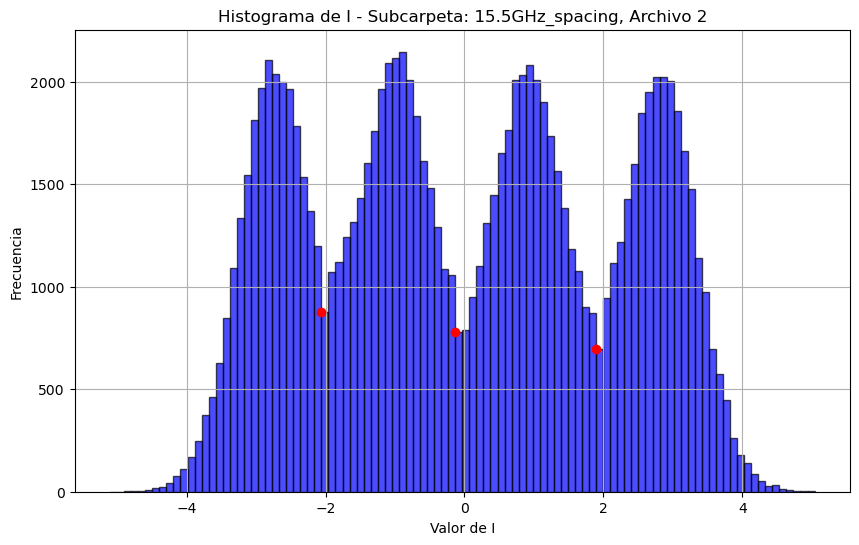

Datos del histograma de I - Subcarpeta: 15.5GHz_spacing, Archivo 3
Cuentas: [   2    2    4    1    2   10   15   18   45   77  107  200  269  440
  598  777 1048 1254 1542 1925 2004 2119 2246 2130 1981 1847 1607 1346
 1151  805  846  920  978 1088 1210 1468 1680 1941 2133 2217 2173 2247
 2067 1791 1561 1302 1164  993  813  665  569  793  971 1140 1241 1525
 1831 1962 2078 2076 2146 2034 1835 1705 1422 1151  918  797  745  683
  568  822  941 1213 1432 1570 1848 2029 2120 2120 2211 1973 1726 1501
 1147  922  722  527  354  221  174  104   63   44   26   19    7    4
    2    3]
Bin edges: [-4.94534282 -4.84711246 -4.74888209 -4.65065173 -4.55242136 -4.454191
 -4.35596064 -4.25773027 -4.15949991 -4.06126954 -3.96303918 -3.86480881
 -3.76657845 -3.66834809 -3.57011772 -3.47188736 -3.37365699 -3.27542663
 -3.17719627 -3.0789659  -2.98073554 -2.88250517 -2.78427481 -2.68604444
 -2.58781408 -2.48958372 -2.39135335 -2.29312299 -2.19489262 -2.09666226
 -1.9984319  -1.90020153 -1.80197117 -1.7

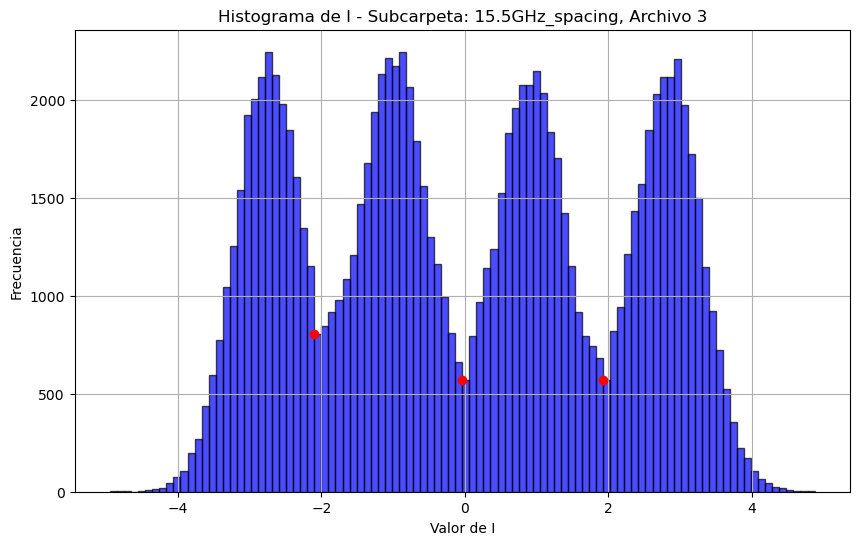

Datos del histograma de I - Subcarpeta: 15.5GHz_spacing, Archivo 4
Cuentas: [   1    0    0    3    6    8    9   14   26   57   61  130  211  306
  473  674  924 1227 1513 1932 2209 2323 2395 2350 2137 1909 1594 1264
 1082  866  798  861  943 1048 1235 1525 1852 2136 2283 2412 2405 2363
 2060 1772 1490 1166  986  821  713  570  684  842 1028 1193 1519 1718
 1977 2163 2279 2348 2124 2046 1742 1467 1163  989  793  679  588  623
  820  993 1173 1446 1661 1972 2166 2353 2282 2165 1986 1689 1438 1114
  827  610  365  257  177  107   69   39   19   14    3    4    3    1
    1    2]
Bin edges: [-5.03044468 -4.92937538 -4.82830607 -4.72723677 -4.62616746 -4.52509816
 -4.42402885 -4.32295955 -4.22189025 -4.12082094 -4.01975164 -3.91868233
 -3.81761303 -3.71654372 -3.61547442 -3.51440511 -3.41333581 -3.3122665
 -3.2111972  -3.11012789 -3.00905859 -2.90798928 -2.80691998 -2.70585067
 -2.60478137 -2.50371207 -2.40264276 -2.30157346 -2.20050415 -2.09943485
 -1.99836554 -1.89729624 -1.79622693 -1.

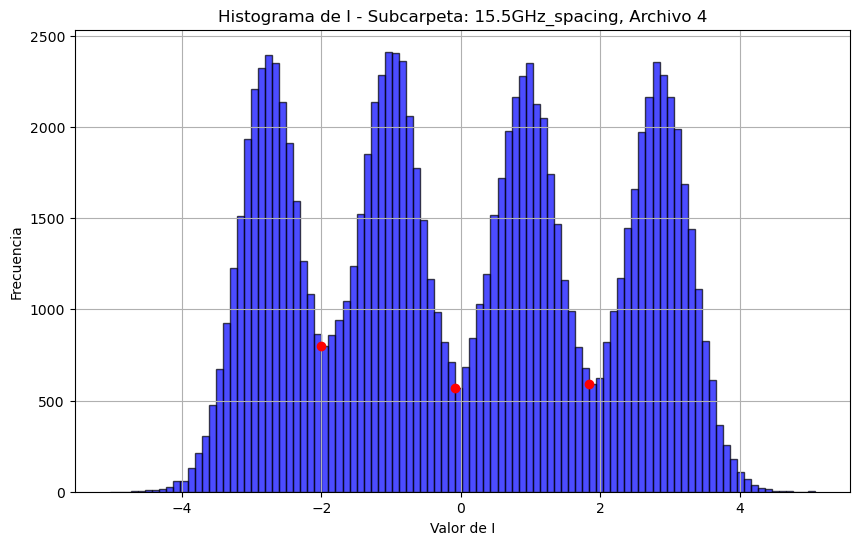

Datos del histograma de I - Subcarpeta: 15.5GHz_spacing, Archivo 5
Cuentas: [   2    6    4   10    8   13   38   42   69  134  196  270  421  597
  848 1119 1412 1737 2026 2201 2321 2306 2098 1933 1672 1404 1186 1025
  799  624  685  740  898 1075 1288 1491 1841 2007 2379 2422 2356 2215
 1936 1631 1417 1089  903  736  652  529  533  665  735  932 1110 1417
 1661 1904 2164 2258 2259 2122 1960 1763 1490 1175 1000  773  647  549
  473  492  670  829 1014 1273 1499 1812 1983 2182 2203 2142 2061 1848
 1659 1357 1070  802  522  344  270  167   99   56   45   25   18   10
    6    5]
Bin edges: [-4.72996628 -4.63593612 -4.54190596 -4.44787581 -4.35384565 -4.25981549
 -4.16578533 -4.07175517 -3.97772501 -3.88369485 -3.7896647  -3.69563454
 -3.60160438 -3.50757422 -3.41354406 -3.3195139  -3.22548374 -3.13145359
 -3.03742343 -2.94339327 -2.84936311 -2.75533295 -2.66130279 -2.56727264
 -2.47324248 -2.37921232 -2.28518216 -2.191152   -2.09712184 -2.00309168
 -1.90906153 -1.81503137 -1.72100121 -1

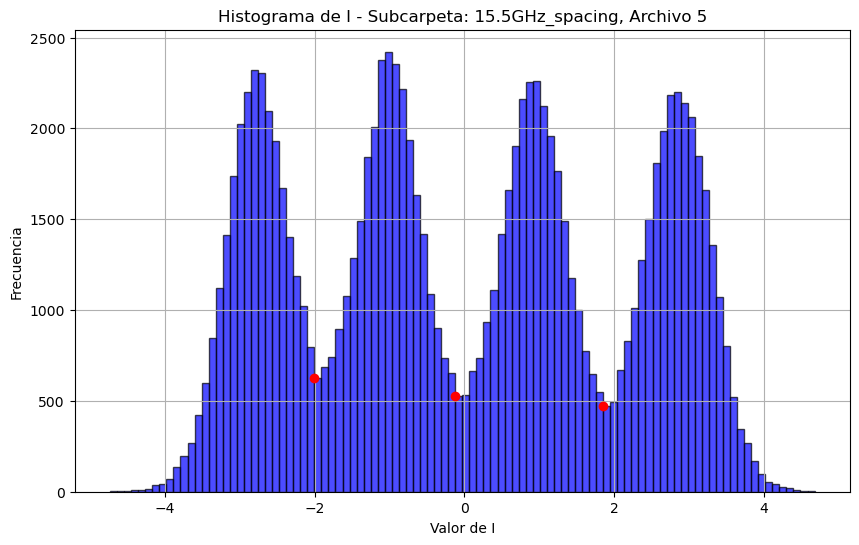

Datos del histograma de I - Subcarpeta: 15.5GHz_spacing, Archivo 6
Cuentas: [   1    0    1    0    0    3    0   10    8   15   32   61  103  150
  219  376  549  872 1170 1569 1946 2397 2545 2610 2472 2229 1952 1534
 1265 1011  826  553  649  643  753  926 1254 1629 2032 2354 2647 2668
 2471 2291 1965 1571 1259 1049  776  610  571  442  553  683  767 1095
 1401 1675 2001 2348 2534 2469 2425 2108 1784 1418 1198  917  676  564
  431  386  594  667  887 1136 1434 1693 2008 2305 2506 2508 2347 2136
 1779 1337 1048  670  513  306  208  139   74   41   18   21    6    7
    3    1]
Bin edges: [-5.0763072  -4.97816921 -4.88003121 -4.78189322 -4.68375523 -4.58561723
 -4.48747924 -4.38934124 -4.29120325 -4.19306525 -4.09492726 -3.99678926
 -3.89865127 -3.80051327 -3.70237528 -3.60423728 -3.50609929 -3.40796129
 -3.3098233  -3.2116853  -3.11354731 -3.01540932 -2.91727132 -2.81913333
 -2.72099533 -2.62285734 -2.52471934 -2.42658135 -2.32844335 -2.23030536
 -2.13216736 -2.03402937 -1.93589137 -1

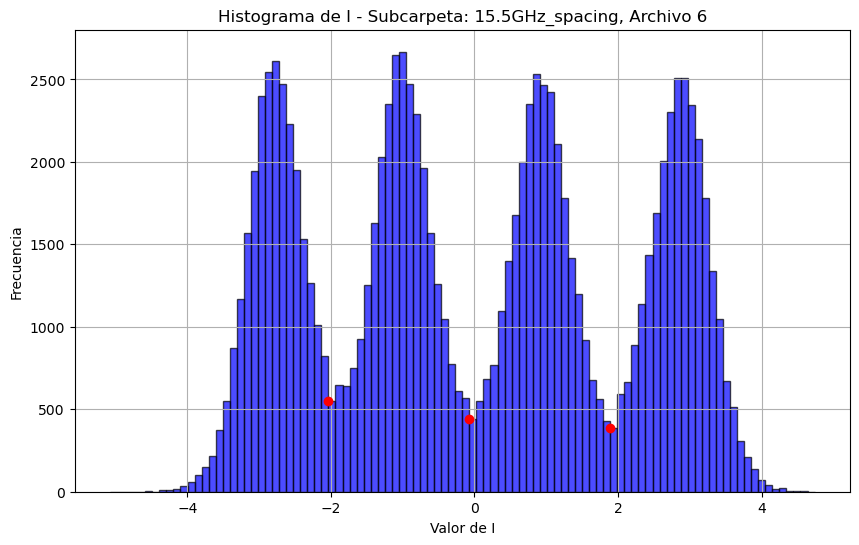

Datos del histograma de I - Subcarpeta: 15.5GHz_spacing, Archivo 7
Cuentas: [   1    1    0    3    1    6   10   13   18   35   67   95  152  221
  356  567  896 1144 1726 2011 2353 2646 2687 2506 2220 1855 1534 1187
  877  771  519  629  679  815  988 1358 1724 2091 2425 2797 2655 2522
 2279 1855 1527 1214  922  732  619  524  441  568  727  895 1169 1463
 1817 2189 2419 2536 2559 2318 2014 1648 1333 1048  791  603  515  401
  510  604  762 1079 1256 1579 1922 2251 2469 2582 2500 2244 1866 1477
 1197  825  520  353  261  117   91   49   33    9    8    6    3    3
    0    1]
Bin edges: [-4.991363   -4.89227908 -4.79319516 -4.69411124 -4.59502732 -4.4959434
 -4.39685948 -4.29777556 -4.19869164 -4.09960772 -4.0005238  -3.90143988
 -3.80235596 -3.70327204 -3.60418812 -3.5051042  -3.40602028 -3.30693636
 -3.20785244 -3.10876852 -3.0096846  -2.91060068 -2.81151676 -2.71243284
 -2.61334892 -2.514265   -2.41518108 -2.31609715 -2.21701323 -2.11792931
 -2.01884539 -1.91976147 -1.82067755 -1.

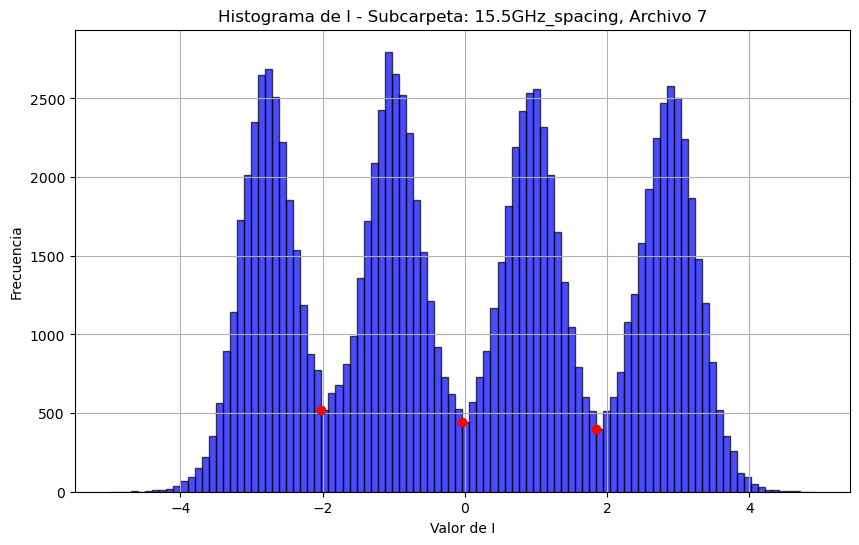

Datos del histograma de I - Subcarpeta: 15.5GHz_spacing, Archivo 8
Cuentas: [   1    1    3    7   11   15   28   45   71  113  196  316  444  681
  986 1346 1781 2113 2454 2542 2634 2364 2133 1717 1443 1098  847  725
  489  554  573  655  849 1035 1378 1683 2179 2421 2587 2527 2471 2177
 1784 1378 1094  825  666  574  437  388  484  565  764  961 1202 1533
 1864 2138 2405 2494 2433 2183 1938 1643 1278  981  774  597  468  428
  364  515  587  825 1011 1370 1575 1852 2210 2463 2500 2389 2179 1944
 1551 1147  825  601  373  241  131   98   55   35   17   16    8    5
    2    3]
Bin edges: [-4.65409062 -4.5605182  -4.46694578 -4.37337337 -4.27980095 -4.18622853
 -4.09265611 -3.99908369 -3.90551127 -3.81193885 -3.71836643 -3.62479401
 -3.53122159 -3.43764917 -3.34407675 -3.25050433 -3.15693191 -3.06335949
 -2.96978707 -2.87621465 -2.78264223 -2.68906981 -2.59549739 -2.50192497
 -2.40835255 -2.31478013 -2.22120771 -2.12763529 -2.03406287 -1.94049045
 -1.84691803 -1.75334561 -1.65977319 -1

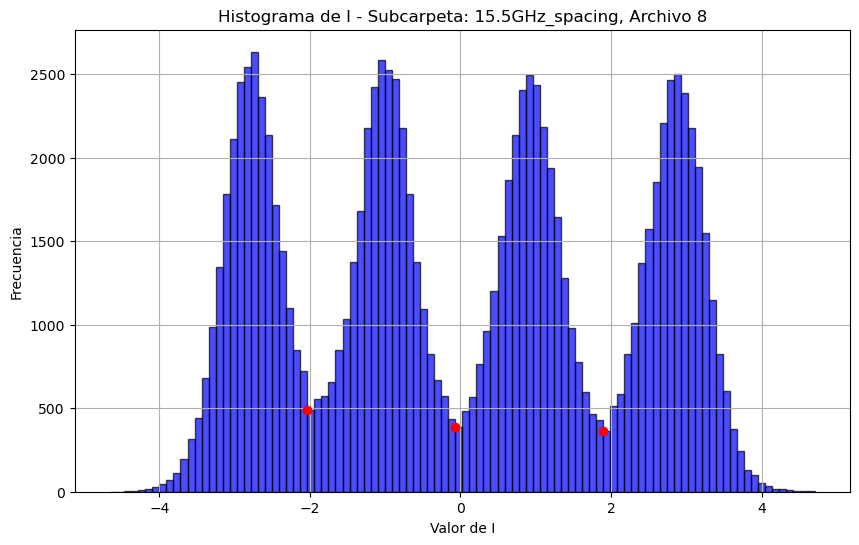

Datos del histograma de I - Subcarpeta: 15.5GHz_spacing, Archivo 9
Cuentas: [   5    4    8   11   17   32   48   77  133  207  292  442  688  973
 1367 1797 2145 2416 2580 2527 2330 2075 1786 1422 1107  860  687  458
  538  507  625  765  955 1279 1592 2092 2384 2526 2621 2566 2193 1843
 1556 1162  919  716  561  451  361  384  486  624  797  996 1260 1564
 1911 2300 2371 2448 2373 2251 1910 1529 1173  881  691  493  450  406
  357  504  591  782  989 1278 1581 1838 2161 2421 2489 2391 2281 1877
 1618 1163  880  591  369  272  171  107   59   31   28   10    8    8
    1    4]
Bin edges: [-4.52687525 -4.43496452 -4.34305379 -4.25114306 -4.15923233 -4.0673216
 -3.97541087 -3.88350014 -3.79158941 -3.69967868 -3.60776795 -3.51585722
 -3.42394649 -3.33203576 -3.24012503 -3.1482143  -3.05630357 -2.96439284
 -2.87248211 -2.78057138 -2.68866065 -2.59674992 -2.50483919 -2.41292846
 -2.32101773 -2.229107   -2.13719627 -2.04528554 -1.95337481 -1.86146408
 -1.76955335 -1.67764262 -1.58573189 -1.

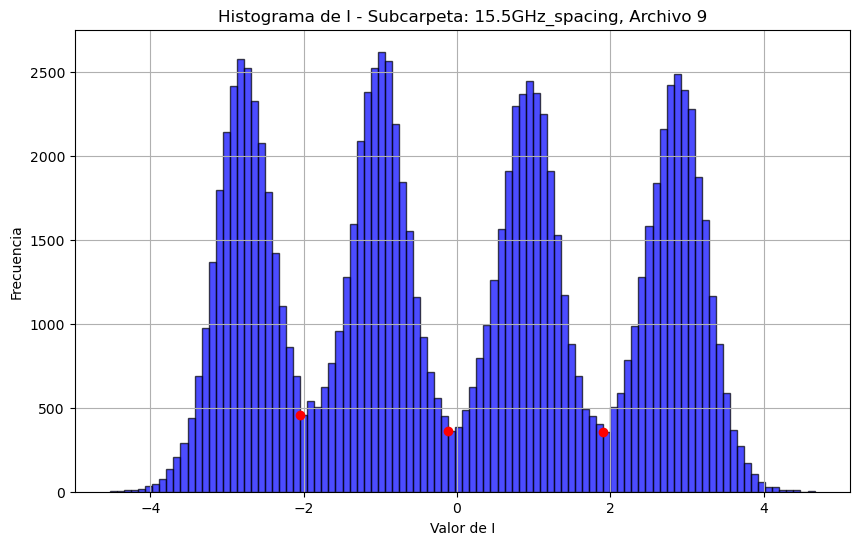

In [56]:
# Lista las subcarpetas disponibles
list_subfolders(data)

plot_histograms_for_subfolder(data, selected_subfolder, 'I')

Datos del histograma de Q - Subcarpeta: 15.5GHz_spacing, Archivo 1
Cuentas: [   1    2    2    4    2    4    7    9   32   43   51   91  134  196
  278  391  510  680  835 1078 1309 1529 1708 1820 1877 1882 1832 1852
 1771 1620 1463 1289  904 1082 1199 1187 1282 1360 1563 1694 1822 1990
 1928 1958 1995 1891 1690 1686 1429 1331 1203  899 1095 1214 1287 1440
 1560 1720 1856 1935 2125 2012 1953 1914 1857 1660 1488 1430 1423 1316
 1306 1168 1526 1698 1744 1877 2046 1986 1939 1789 1595 1431 1247  973
  742  608  473  325  255  155  116   77   47   25   16    7    4    2
    3    4]
Bin edges: [-5.45150021 -5.34593251 -5.2403648  -5.13479709 -5.02922939 -4.92366168
 -4.81809398 -4.71252627 -4.60695856 -4.50139086 -4.39582315 -4.29025544
 -4.18468774 -4.07912003 -3.97355233 -3.86798462 -3.76241691 -3.65684921
 -3.5512815  -3.4457138  -3.34014609 -3.23457838 -3.12901068 -3.02344297
 -2.91787527 -2.81230756 -2.70673985 -2.60117215 -2.49560444 -2.39003673
 -2.28446903 -2.17890132 -2.07333362 -1

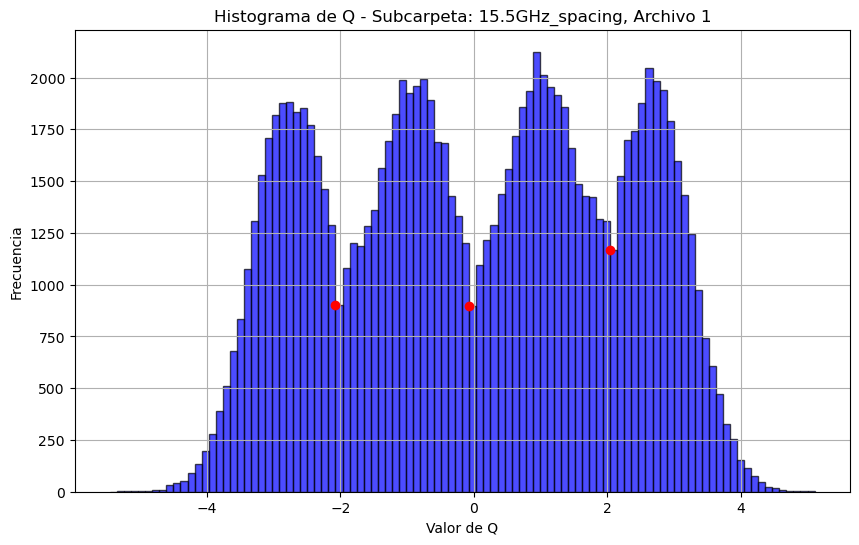

Datos del histograma de Q - Subcarpeta: 15.5GHz_spacing, Archivo 2
Cuentas: [   1    0    0    3    5    8   13   24   31   66   79  161  180  320
  432  595  811 1010 1256 1444 1684 1857 2015 2079 2023 1996 1787 1648
 1406 1175 1079  799  944 1053 1097 1159 1343 1555 1756 1911 2058 2115
 2039 1978 1874 1771 1590 1348 1153 1032  696  965 1044 1200 1365 1564
 1725 1880 2049 2160 2107 2083 1949 1744 1582 1423 1344 1290 1165 1064
 1127 1396 1546 1846 1968 2054 2011 2049 1965 1827 1527 1372 1096  846
  653  440  339  219  156   86   66   53   27   14   11    5    0    0
    2    1]
Bin edges: [-5.24036345 -5.13663248 -5.0329015  -4.92917053 -4.82543955 -4.72170858
 -4.6179776  -4.51424663 -4.41051565 -4.30678468 -4.2030537  -4.09932272
 -3.99559175 -3.89186077 -3.7881298  -3.68439882 -3.58066785 -3.47693687
 -3.3732059  -3.26947492 -3.16574395 -3.06201297 -2.958282   -2.85455102
 -2.75082004 -2.64708907 -2.54335809 -2.43962712 -2.33589614 -2.23216517
 -2.12843419 -2.02470322 -1.92097224 -1

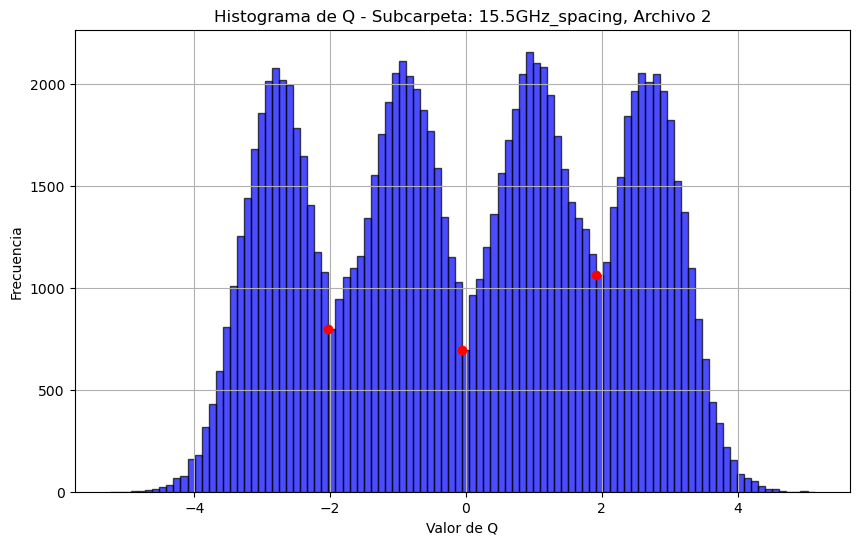

Datos del histograma de Q - Subcarpeta: 15.5GHz_spacing, Archivo 3
Cuentas: [   1    2    2    2    2    3    7   23   22   33   65  114  173  240
  341  490  709  859 1152 1431 1648 1869 1976 2069 2030 2025 1890 1697
 1464 1285 1070  918  626  764  793  852 1007 1169 1374 1534 1729 1971
 2049 2056 2142 2040 1827 1527 1378 1183  987  869  650  681  862  955
 1109 1257 1521 1678 1929 2097 2127 2136 2059 1913 1758 1525 1281 1142
 1113  910  900  883 1135 1341 1551 1726 2005 2080 2091 2135 1959 1887
 1608 1406 1102  863  631  452  336  210  139   82   67   35   22   11
    9    6]
Bin edges: [-5.15274626 -5.05522571 -4.95770517 -4.86018462 -4.76266408 -4.66514353
 -4.56762299 -4.47010244 -4.37258189 -4.27506135 -4.1775408  -4.08002026
 -3.98249971 -3.88497917 -3.78745862 -3.68993808 -3.59241753 -3.49489698
 -3.39737644 -3.29985589 -3.20233535 -3.1048148  -3.00729426 -2.90977371
 -2.81225316 -2.71473262 -2.61721207 -2.51969153 -2.42217098 -2.32465044
 -2.22712989 -2.12960935 -2.0320888  -1

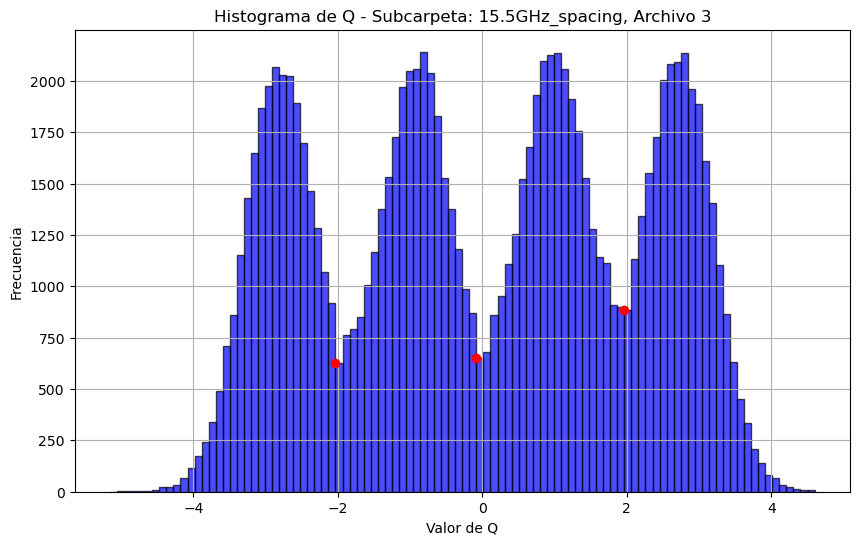

Datos del histograma de Q - Subcarpeta: 15.5GHz_spacing, Archivo 4
Cuentas: [   1    1    1    1    5    2   10   14   25   46   76  117  180  261
  401  514  745  988 1290 1554 1818 2091 2248 2276 2195 2053 1792 1585
 1342 1091  912  641  741  728  865  948 1159 1333 1701 1902 2149 2259
 2241 2157 1960 1810 1618 1278 1121  841  810  566  765  850 1018 1217
 1450 1766 1910 2171 2324 2354 2189 2003 1821 1614 1329 1093  943  921
  887  825 1178 1399 1703 1888 2084 2265 2262 2233 2072 1819 1616 1257
  939  731  544  328  238  158   97   63   33   17    8   10    3    4
    1    1]
Bin edges: [-5.16457896 -5.0639678  -4.96335665 -4.8627455  -4.76213434 -4.66152319
 -4.56091204 -4.46030088 -4.35968973 -4.25907858 -4.15846742 -4.05785627
 -3.95724512 -3.85663396 -3.75602281 -3.65541166 -3.5548005  -3.45418935
 -3.3535782  -3.25296704 -3.15235589 -3.05174473 -2.95113358 -2.85052243
 -2.74991127 -2.64930012 -2.54868897 -2.44807781 -2.34746666 -2.24685551
 -2.14624435 -2.0456332  -1.94502205 -1

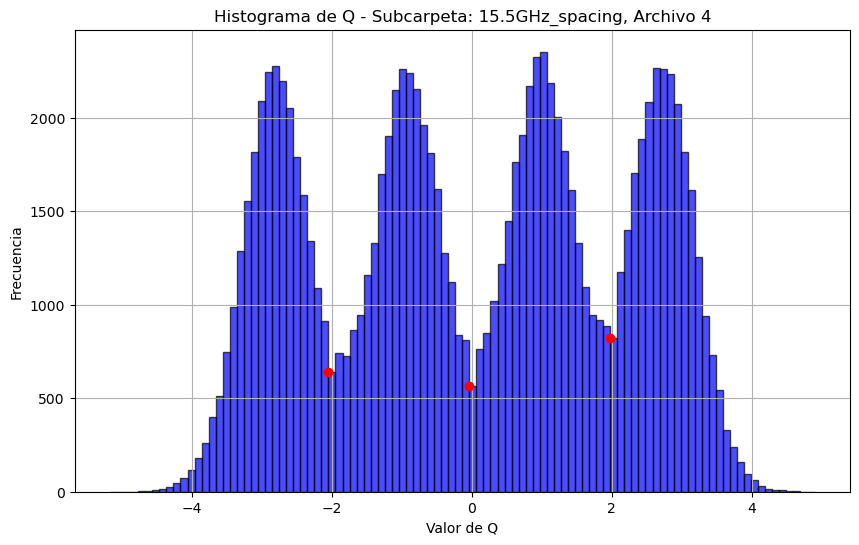

Datos del histograma de Q - Subcarpeta: 15.5GHz_spacing, Archivo 5
Cuentas: [   1    3    4    5   17   10   27   40   81  122  182  276  398  575
  794 1103 1384 1671 1932 2087 2291 2239 2199 1949 1746 1568 1243 1008
  790  596  601  649  722  814 1081 1261 1630 1750 2086 2206 2316 2264
 2124 1955 1680 1359 1073  928  742  605  539  677  762  945 1141 1463
 1741 1965 2255 2274 2383 2269 2089 1796 1511 1217 1075  904  781  787
  703  992 1215 1380 1766 2048 2164 2399 2440 2274 2016 1703 1447 1076
  794  592  411  261  160  100   64   42   23   16   11    3    1    1
    0    1]
Bin edges: [-4.88261435e+00 -4.78490835e+00 -4.68720235e+00 -4.58949635e+00
 -4.49179035e+00 -4.39408435e+00 -4.29637835e+00 -4.19867236e+00
 -4.10096636e+00 -4.00326036e+00 -3.90555436e+00 -3.80784836e+00
 -3.71014236e+00 -3.61243636e+00 -3.51473036e+00 -3.41702436e+00
 -3.31931837e+00 -3.22161237e+00 -3.12390637e+00 -3.02620037e+00
 -2.92849437e+00 -2.83078837e+00 -2.73308237e+00 -2.63537637e+00
 -2.53767037e+

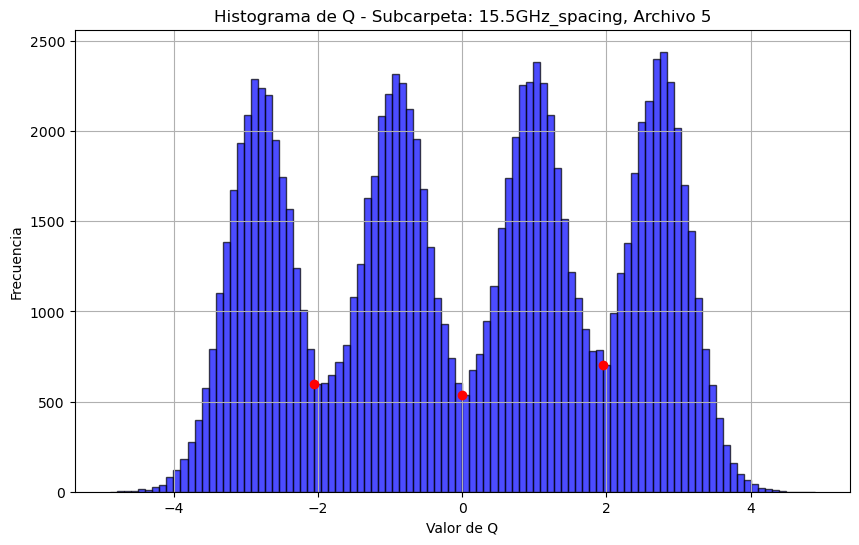

Datos del histograma de Q - Subcarpeta: 15.5GHz_spacing, Archivo 6
Cuentas: [   1    2    2    3    5    8    8   23   44   88  105  187  270  417
  597  861 1199 1540 1791 2146 2337 2475 2458 2137 1906 1562 1342 1084
  862  704  463  571  600  713  871 1093 1373 1744 2055 2258 2491 2448
 2337 2069 1742 1447 1168  961  704  584  490  558  686  807  977 1271
 1603 1932 2184 2344 2453 2518 2313 2000 1682 1357 1084  877  747  641
  592  820 1055 1281 1663 1886 2298 2471 2491 2419 2250 1820 1588 1217
  871  640  419  271  148  113   52   54   28   13    8    9    4    1
    1    1]
Bin edges: [-4.94934051 -4.85126952 -4.75319853 -4.65512754 -4.55705655 -4.45898556
 -4.36091457 -4.26284358 -4.16477259 -4.0667016  -3.96863061 -3.87055962
 -3.77248863 -3.67441763 -3.57634664 -3.47827565 -3.38020466 -3.28213367
 -3.18406268 -3.08599169 -2.9879207  -2.88984971 -2.79177872 -2.69370773
 -2.59563674 -2.49756575 -2.39949476 -2.30142377 -2.20335278 -2.10528179
 -2.0072108  -1.9091398  -1.81106881 -1

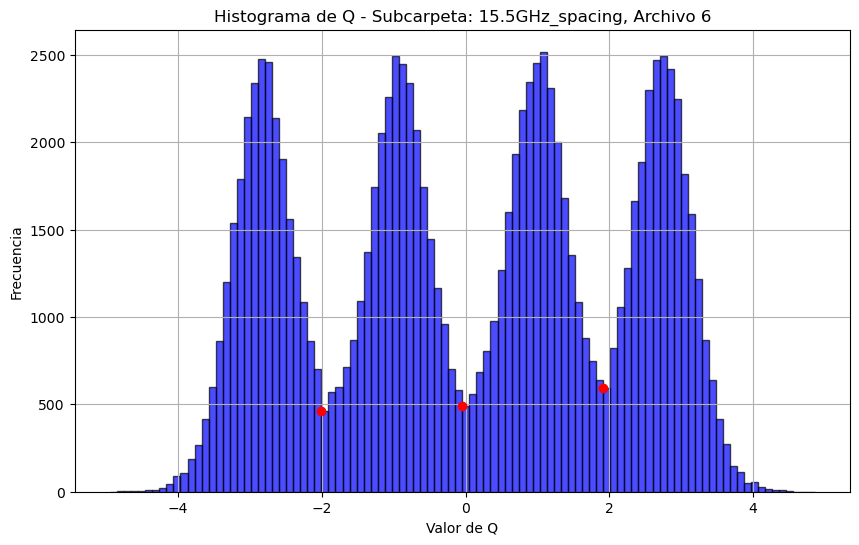

Datos del histograma de Q - Subcarpeta: 15.5GHz_spacing, Archivo 7
Cuentas: [   1    0    1    1    4    8    8   18   23   30   76   79  155  250
  387  516  799 1093 1433 1738 2053 2377 2418 2383 2316 1998 1753 1393
 1150  855  694  520  588  574  677  830 1114 1342 1638 1910 2237 2473
 2492 2357 2157 1764 1584 1266  962  798  634  467  517  714  776  957
 1263 1647 1911 2188 2521 2516 2492 2273 2057 1629 1301 1056  851  713
  681  575  882 1115 1332 1726 2006 2233 2385 2556 2410 2248 1907 1565
 1129  813  565  351  225  167   93   37   33   27   14   10    2    0
    0    1]
Bin edges: [-5.08878472 -4.98998773 -4.89119075 -4.79239376 -4.69359678 -4.59479979
 -4.49600281 -4.39720582 -4.29840883 -4.19961185 -4.10081486 -4.00201788
 -3.90322089 -3.8044239  -3.70562692 -3.60682993 -3.50803295 -3.40923596
 -3.31043898 -3.21164199 -3.112845   -3.01404802 -2.91525103 -2.81645405
 -2.71765706 -2.61886008 -2.52006309 -2.4212661  -2.32246912 -2.22367213
 -2.12487515 -2.02607816 -1.92728118 -1

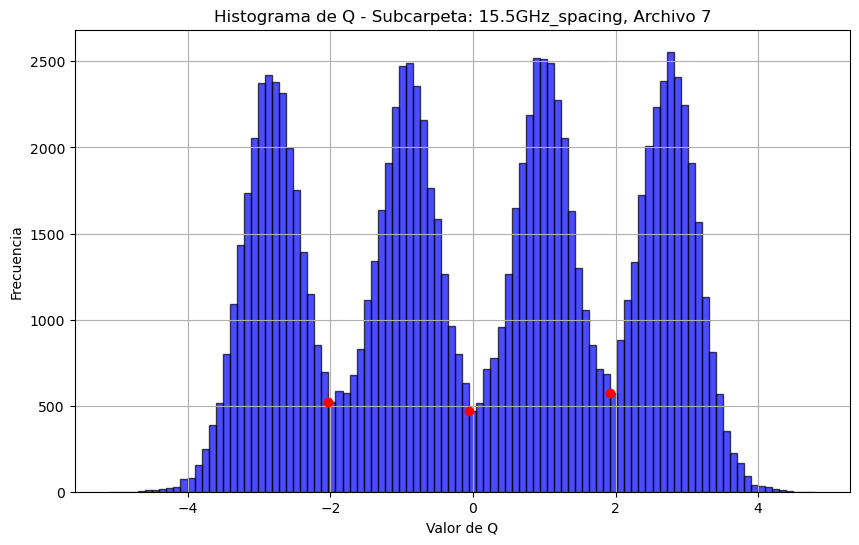

Datos del histograma de Q - Subcarpeta: 15.5GHz_spacing, Archivo 8
Cuentas: [   1    0    0    1    0    2    1    8   16   25   33   70  106  144
  218  415  624  849 1136 1484 1887 2102 2460 2603 2545 2237 2000 1642
 1247 1032  770  642  504  398  506  571  742  933 1160 1438 1873 2166
 2378 2490 2591 2328 2067 1645 1271  990  729  620  549  378  466  604
  728  900 1247 1583 1954 2260 2475 2560 2523 2344 2034 1647 1337  967
  831  642  591  526  715  902 1128 1463 1824 2129 2369 2617 2518 2386
 2126 1771 1268  984  657  444  264  169  126   77   39   19   12    8
    1    2]
Bin edges: [-5.09513704 -4.99922701 -4.90331697 -4.80740693 -4.71149689 -4.61558685
 -4.51967681 -4.42376677 -4.32785674 -4.2319467  -4.13603666 -4.04012662
 -3.94421658 -3.84830654 -3.7523965  -3.65648647 -3.56057643 -3.46466639
 -3.36875635 -3.27284631 -3.17693627 -3.08102624 -2.9851162  -2.88920616
 -2.79329612 -2.69738608 -2.60147604 -2.505566   -2.40965597 -2.31374593
 -2.21783589 -2.12192585 -2.02601581 -1

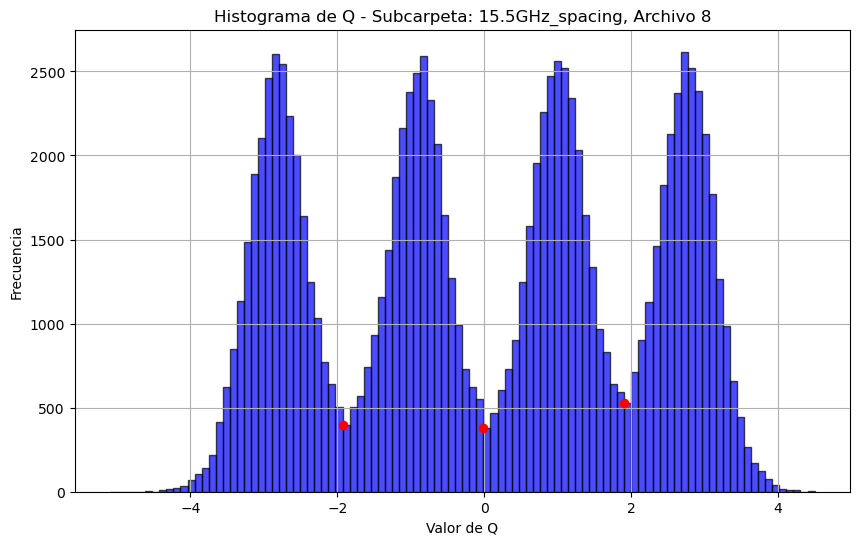

Datos del histograma de Q - Subcarpeta: 15.5GHz_spacing, Archivo 9
Cuentas: [   1    3    4    9   19   21   43   55   94  157  255  387  528  790
 1147 1479 1831 2189 2485 2595 2469 2242 1927 1661 1342 1066  842  637
  502  401  443  520  635  851 1132 1433 1808 2100 2418 2492 2417 2342
 2039 1750 1385 1065  831  625  553  382  475  581  646  802 1105 1398
 1773 2114 2341 2577 2603 2508 2091 1791 1443 1101  915  682  634  581
  501  744 1006 1234 1545 1935 2274 2510 2525 2473 2354 1919 1591 1276
  802  569  403  244  169  100   60   22   14   19    7    3    1    0
    0    1]
Bin edges: [-4.69981171 -4.60485088 -4.50989005 -4.41492923 -4.3199684  -4.22500758
 -4.13004675 -4.03508593 -3.9401251  -3.84516427 -3.75020345 -3.65524262
 -3.5602818  -3.46532097 -3.37036014 -3.27539932 -3.18043849 -3.08547767
 -2.99051684 -2.89555602 -2.80059519 -2.70563436 -2.61067354 -2.51571271
 -2.42075189 -2.32579106 -2.23083024 -2.13586941 -2.04090858 -1.94594776
 -1.85098693 -1.75602611 -1.66106528 -1

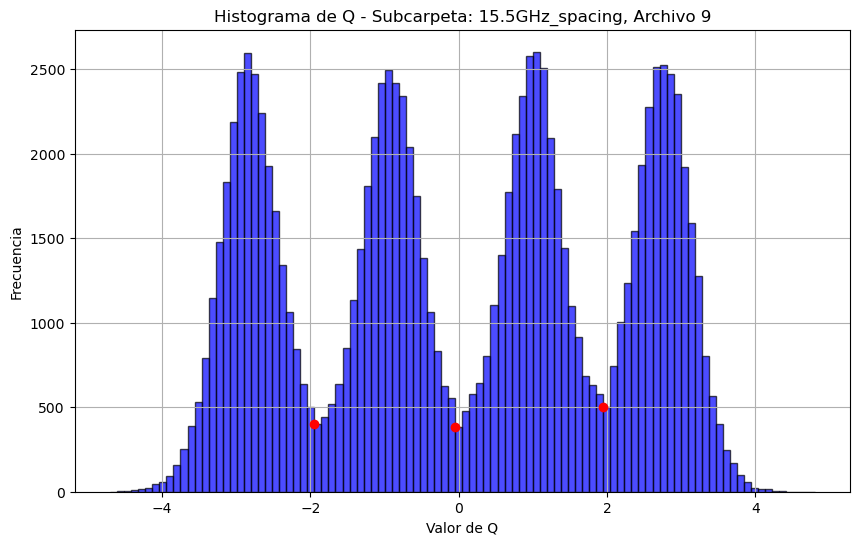

In [68]:
plot_histograms_for_subfolder(data, selected_subfolder, 'Q')